# Udacity Project: Predicting Bike Sharing Patterns

# Preparation: Python Environment

In [6]:
#pip install --upgrade pip
#pip install numpy
#pip install pandas
#pip install matplotlib

Import Python modules needed: Pandas, NumPy and Matplotlib

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Start: Input Data

A new folder 'data' should be created in the same directory where the Jupyter notebook is stored. In this folder time series raw data should be stored (e.g. csv file).

In [8]:
data_path = 'data/hour.csv'
rides = pd.read_csv(data_path)

CSV file has been converted to Pandas dataframe named **'rides'**. Dimension of csv-data is shown here.

In [9]:
rides.shape

(17379, 17)

Features or column names can be listed using the command **list(dataframe)**.

We can see the number of columns above. The names are listed below.

In [10]:
list(rides)

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

We can see the datatypes of the columns/features below.

In [11]:
rides.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [12]:
rides.head().style.set_properties(subset=['dteday'], **{'background-color': 'dodgerblue'})

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.240000,0.287900,0.750000,0.000000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.240000,0.287900,0.750000,0.000000,0,1,1


# Data Exploration

Below some data is plotted. One can see how the number of riders changes in correlation to one of the features (please see columns above).

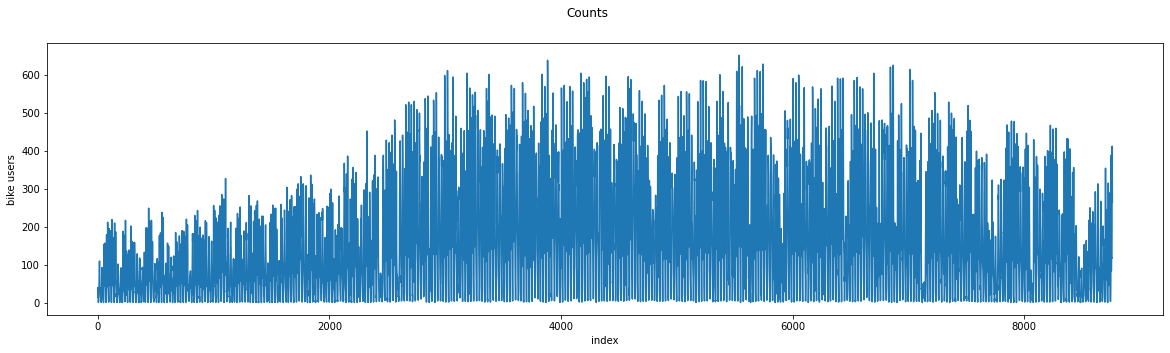

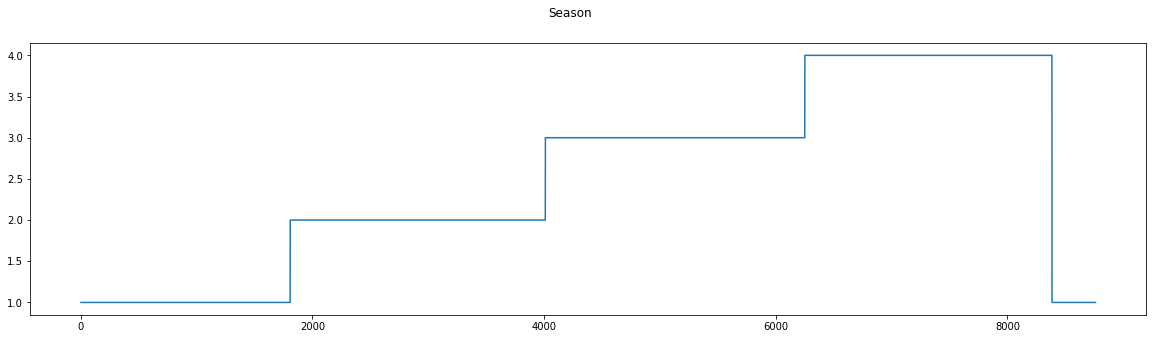

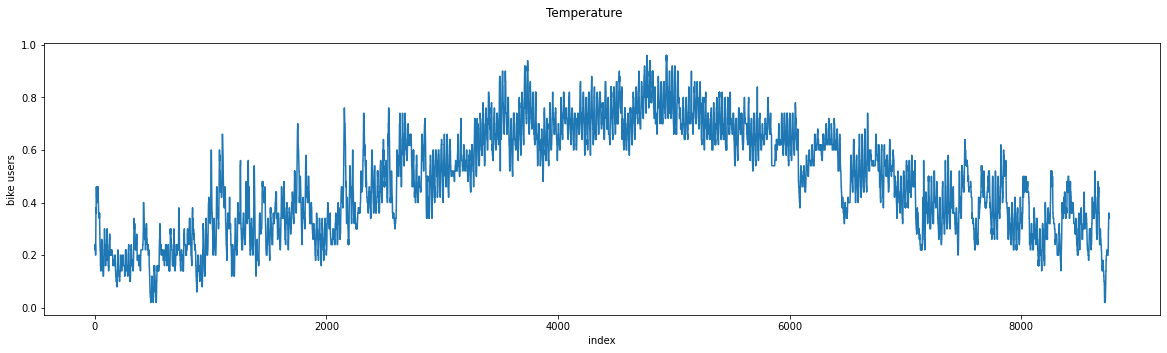

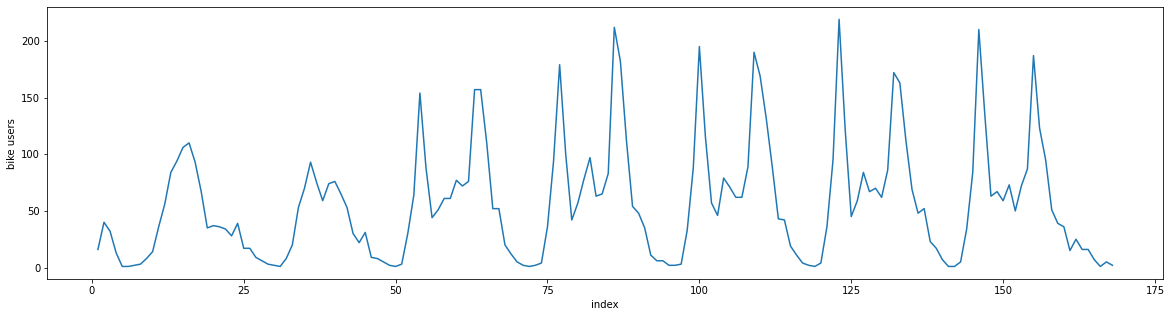

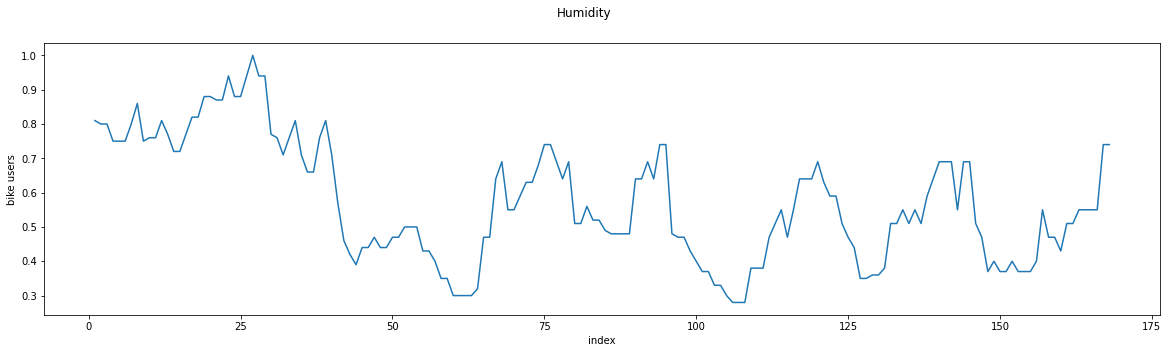

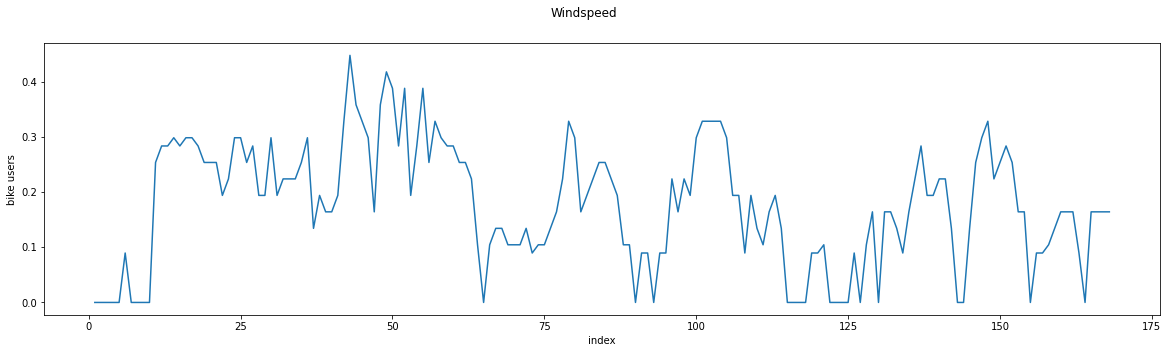

In [13]:
fig,ax = plt.subplots(figsize=(20,5))
x = rides[:365*24]['instant']
y = rides[:365*24]['cnt']
fig.suptitle('Counts',fontsize=12)
ax.set_xlabel('index', fontsize=10)
ax.set_ylabel('bike users', fontsize=10)
ax.plot(x,y)

fig1,ax1 = plt.subplots(figsize=(20,5))
x1 = rides[:365*24]['instant']
y1 = rides[:365*24]['season']
fig1.suptitle('Season',fontsize=12)
ax.set_xlabel('index', fontsize=10)
ax.set_ylabel('bike users', fontsize=10)
ax1.plot(x1,y1)

fig2,ax2 = plt.subplots(figsize=(20,5))
x2 = rides[:365*24]['instant']
y2 = rides[:365*24]['temp']
fig2.suptitle('Temperature',fontsize=12)
ax2.set_xlabel('index', fontsize=10)
ax2.set_ylabel('bike users', fontsize=10)
ax2.plot(x2,y2)

fig5,ax5 = plt.subplots(figsize=(20,5))
x5 = rides[:7*24]['instant']
y5 = rides[:7*24]['cnt']
fig.suptitle('Counts',fontsize=12)
ax5.set_xlabel('index', fontsize=10)
ax5.set_ylabel('bike users', fontsize=10)
ax5.plot(x5,y5)

fig3,ax3 = plt.subplots(figsize=(20,5))
x3 = rides[:7*24]['instant']
y3 = rides[:7*24]['hum']
fig3.suptitle('Humidity',fontsize=12)
ax3.set_xlabel('index', fontsize=10)
ax3.set_ylabel('bike users', fontsize=10)
ax3.plot(x3,y3)

fig4,ax4 = plt.subplots(figsize=(20,5))
x4 = rides[:7*24]['instant']
y4 = rides[:7*24]['windspeed']
fig4.suptitle('Windspeed',fontsize=12)
ax4.set_xlabel('index', fontsize=10)
ax4.set_ylabel('bike users', fontsize=10)
ax4.plot(x4,y4)

<AxesSubplot:>

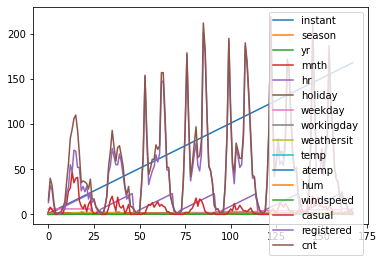

In [14]:
rides[:24*7].plot()

Samples:

- Data is available in equidistant time segments: HOURS (hours.csv) and DAYS (days.csv)

Features:

- season (1 = spring, 2 = summer, 3 = autumn, 4 = winter)
- yr (year, 0 = 2011, 1 = 2012)
- mth (month)
- holiday (day was a holiday)
- weekday (0 = Monday, 1 = Tuesday, 3 = Wednesday ...)
- workday (0 = no work, 1 = work)
- weathersit (1 = no clouds, 2 = ... )
- temp (temperature in degree Celsius, normalized, divided by 41 (maximum))
- atemp (feeled temperature in degree Celsius, normalized, divided by 60 (maximum))
- hum (humidity, normalized, divided by 100 (maximum))
- windspeed (windspeed, normalized, divided by 67 (maximum))
- casual (number of unregistered users)
- registered (number of registered users)
- cnt (total count of users)

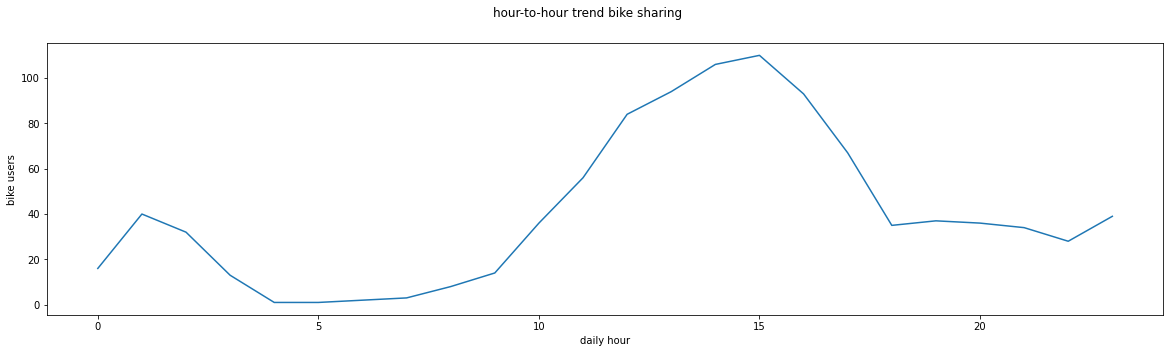

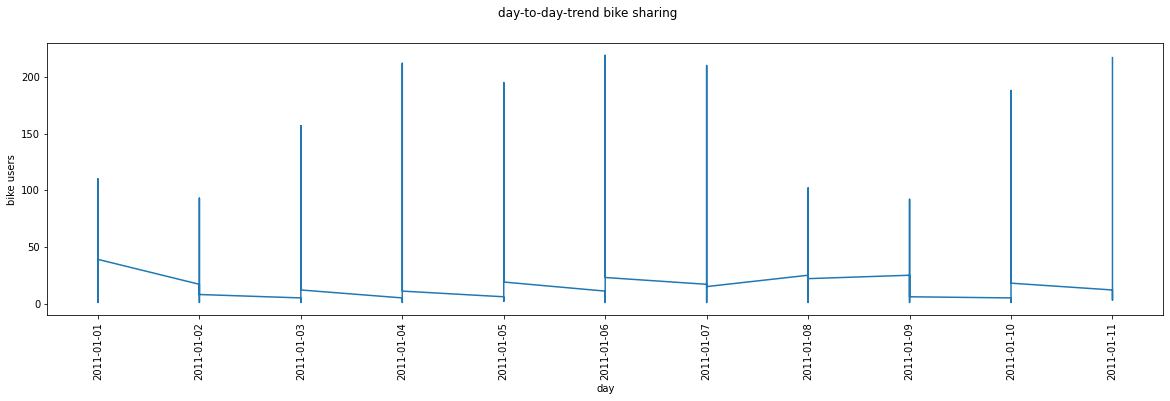

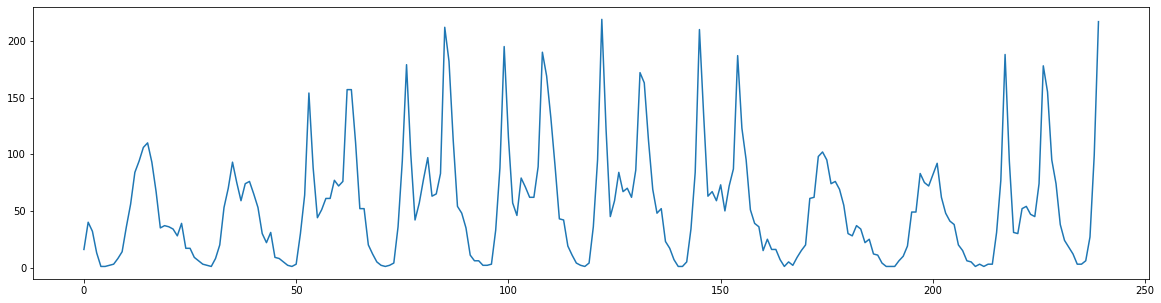

In [15]:
fig,ax = plt.subplots(figsize=(20,5))
x = rides[:24]['hr']
y = rides[:24]['cnt']
fig.suptitle('hour-to-hour trend bike sharing',fontsize=12)
ax.set_xlabel('daily hour', fontsize=10)
ax.set_ylabel('bike users', fontsize=10)
ax.plot(x,y)

fig2,ax2 = plt.subplots(figsize=(20,5))
x2 = rides[:24*10]['dteday']
y2 = rides[:24*10]['cnt']
fig2.suptitle('day-to-day-trend bike sharing',fontsize=12)
ax2.set_xlabel('day', fontsize=10)
ax2.set_ylabel('bike users', fontsize=10)
plt.xticks(rotation=90)
ax2.plot(x2,y2)

fig3,ax3 = plt.subplots(figsize=(20,5))
rides.index=rides.instant
y3 = rides[:24*10]['cnt'].values
ax3.plot(y3)


# One-Hot-Encoding: Mapping of Categorical Values to Binary Values

All columns with categorical data is to be identified. The categorical clusters have to be translated in new columns named CategoricalColumnName+Value. 

This list will be iterated and translated from categorical data to binary data.
The process is called 'one hot encoding'

In [16]:
data_path = 'data/hour.csv'
data = pd.read_csv(data_path)

dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant','dteday','season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


# Scaling Quantitative Variables

Continuous, quantitative attributes as:

- Temperature (temp)
- Wind speed (windspeed)
- Humidity (hum)

are normalized to ease training. 

Discrete, quantitative attributes as:

- Number of Riders (cnt)
- Guest Riders (casual)
- Registered Riders (registered)

are normalized to ease training.

Mean out of all values is generated. Mean, e.g. mean temperature, is subtracted from the respective value, e.g. daily temperature. Difference of mean and actual value is the divided by standard deviation. Result is the normalized value.

In [17]:
quant_features = ['temp','windspeed','hum','cnt','casual','registered']

#Create dictionary
#data is the name of the Pandas dataframe
#Values of mean and standard deviation are stored in the created dictionary

scaled_features={}
for each in quant_features:
    #Berechnen
    mean,std=data[each].mean(),data[each].std()
    scaled_features[each]=[mean,std]
    data.loc[:,each]=(data[each]-mean)/std

scaled_features

{'temp': [0.4969871684216583, 0.1925561212497219],
 'windspeed': [0.1900976063064618, 0.12234022857279049],
 'hum': [0.6272288394038783, 0.19292983406291508],
 'cnt': [189.46308763450142, 181.38759909186473],
 'casual': [35.67621842453536, 49.30503038705308],
 'registered': [153.78686920996606, 151.35728591258314]}

In [18]:
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,-1.334609,0.947345,-1.553844,-0.662736,-0.930162,-0.956312,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,-0.561326,-0.804632,-0.823998,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.438475,0.895513,-1.553844,-0.622172,-0.837666,-0.868103,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,-0.662736,-0.949983,-0.972851,1,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,-1.334609,0.636351,-1.553844,-0.723582,-1.009445,-1.039008,1,0,...,0,0,0,0,0,0,0,0,0,1


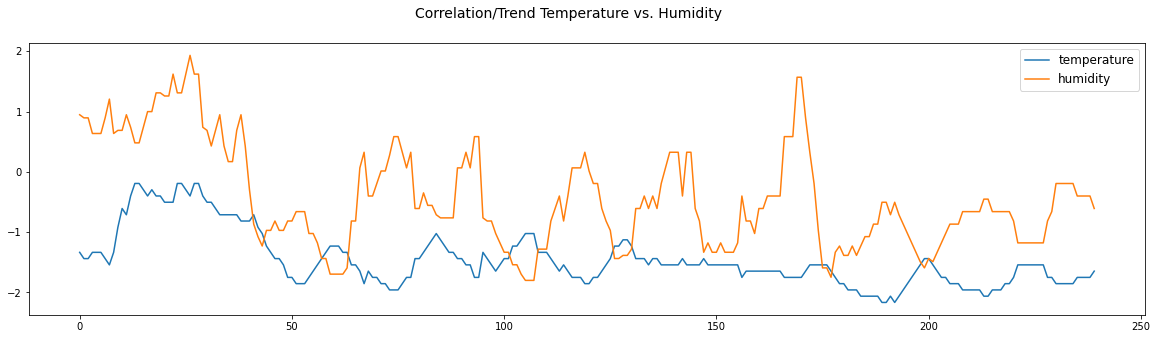

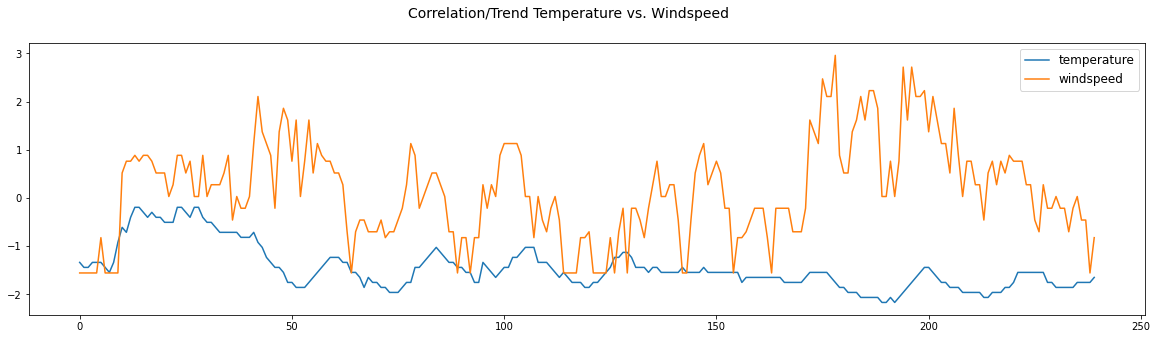

In [19]:
fig4,ax4 = plt.subplots(figsize=(20,5))
rides.index=rides.instant
y4 = data[:24*10]['temp'].values
fig4.suptitle('Correlation/Trend Temperature vs. Humidity',fontsize=14)
ax4.plot(y4, label='temperature')
y5 = data[:24*10]['hum'].values
ax4.plot(y5, label='humidity')
ax4.legend(loc='upper right', fontsize=12)

fig5,ax5 = plt.subplots(figsize=(20,5))
rides.index=rides.instant
y4 = data[:24*10]['temp'].values
fig5.suptitle('Correlation/Trend Temperature vs. Windspeed',fontsize=14)
ax5.plot(y4, label="temperature")
y6 = data[:24*10]['windspeed'].values
ax5.plot(y6, label='windspeed')
ax5.legend(loc='upper right',fontsize=12)

# Split Dataset in Input and Output Data

Features are now splitted in input and output data. **target_columns** are assigned to a list **target_fields**. Here the output columns are listed.

Moreover, a new dataframe **features** is created. It is the same as the **data** dataframe, however minus the output columsn **(= INPUT data)**.

The second dataframe created is **targets**. It contains only **target_fields** **(= OUTPUT data)**.

In [20]:
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,-1.334609,0.947345,-1.553844,-0.662736,-0.930162,-0.956312,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,-0.561326,-0.804632,-0.823998,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.438475,0.895513,-1.553844,-0.622172,-0.837666,-0.868103,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,-0.662736,-0.949983,-0.972851,1,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,-1.334609,0.636351,-1.553844,-0.723582,-1.009445,-1.039008,1,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
list(data)

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'weathersit_1',
 'weathersit_2',
 'weathersit_3',
 'weathersit_4',
 'mnth_1',
 'mnth_2',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'mnth_11',
 'mnth_12',
 'hr_0',
 'hr_1',
 'hr_2',
 'hr_3',
 'hr_4',
 'hr_5',
 'hr_6',
 'hr_7',
 'hr_8',
 'hr_9',
 'hr_10',
 'hr_11',
 'hr_12',
 'hr_13',
 'hr_14',
 'hr_15',
 'hr_16',
 'hr_17',
 'hr_18',
 'hr_19',
 'hr_20',
 'hr_21',
 'hr_22',
 'hr_23',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

In [22]:
print("Data: ", data.shape)
# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
targets=data[target_fields]
print("Split targets...")
#print("Data: ", data.shape)
print("Targets: ", targets.shape)

features = data.drop(target_fields, axis=1)
print("Split features...")
#print("Data: ", data.shape)
print("features: ", features.shape)

#Ensure that there is the same amount of rows in features and targets.
assert(features.shape[0]==targets.shape[0])

Data:  (17379, 59)
Split targets...
Targets:  (17379, 3)
Split features...
features:  (17379, 56)


In [23]:
print("First three rows of feature data: \n\n", features.iloc[:3])

First three rows of feature data: 

          yr  holiday      temp       hum  windspeed  season_1  season_2  \
instant                                                                   
1         0        0 -1.334609  0.947345  -1.553844         1         0   
2         0        0 -1.438475  0.895513  -1.553844         1         0   
3         0        0 -1.438475  0.895513  -1.553844         1         0   

         season_3  season_4  weathersit_1  ...  hr_21  hr_22  hr_23  \
instant                                    ...                        
1               0         0             1  ...      0      0      0   
2               0         0             1  ...      0      0      0   
3               0         0             1  ...      0      0      0   

         weekday_0  weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  \
instant                                                                     
1                0          0          0          0          0          0   


In [24]:
#Show Features (Input-Valuaes, feature values)
features.head()

,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,-1.334609,0.947345,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,0,0,-1.334609,0.636351,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [25]:
print("First three rows of target data: \n\n", targets.iloc[:3])

First three rows of target data: 

               cnt    casual  registered
instant                                
1       -0.956312 -0.662736   -0.930162
2       -0.823998 -0.561326   -0.804632
3       -0.868103 -0.622172   -0.837666


In [26]:
#Show Targets (Output-Values, target values)
targets.head()

,cnt,casual,registered
instant,,,
1,-0.956312,-0.662736,-0.930162
2,-0.823998,-0.561326,-0.804632
3,-0.868103,-0.622172,-0.837666
4,-0.972851,-0.662736,-0.949983
5,-1.039008,-0.723582,-1.009445


# Split Dataset in Data for Training, Test and Validation


## Test Data
We take the last three weeks as 'test' data and delete it from our entire dataset.

## Training Data
Because it is time series data, we train the neural network with data of the past to predict the future. 

## Validation Data
Because it is time series data, we train the neural network with data of the past to predict the future. 
As the future is unknown we pretend the last 60 days of the remaining data to be the 'future' and check whether real labeling corresponds to our predictions.

Data is splitted into test and training data. Data of the last 21 days is stored in list *test_data*. Dataframe *data* will be reduced. It does not contain data of the last 21 days anymore. This remaining data in *data* will be our input for training.

In [27]:
print("Matrix features: ", features.shape)
print("Matrix targets: ", targets.shape)

print("*** Split dataset ***")

test_features=features[-21*24:]
test_targets=targets[-21*24:]
features=features[:-21*24]
targets=targets[:-21*24]

train_features=features[:-60*24]
train_targets=targets[:-60*24]
val_features=features[-60*24:]
val_targets=targets[-60*24:]

print("Matrix test features: ", test_features.shape)
print("Matrix train features: ", train_features.shape)
print("Matrix validation features: ", val_features.shape)

print("Matrix test targets: ", test_targets.shape)
print("Matrix train targets: ", train_features.shape)
print("Matrix validation targets: ", val_features.shape)


Matrix features:  (17379, 56)
Matrix targets:  (17379, 3)
*** Split dataset ***
Matrix test features:  (504, 56)
Matrix train features:  (15435, 56)
Matrix validation features:  (1440, 56)
Matrix test targets:  (504, 3)
Matrix train targets:  (15435, 56)
Matrix validation targets:  (1440, 56)


# Neural Network

## Mean Squared Errors

Function returning MSE (loss).

This function we will use to determine the size of our error. The method is called *mean squared errors*. Why do we take the square value? We do this to just consider deviation from our target. We will ignore whether there is a positive or a negative deviation.

In [28]:
def MSE(y,Y):
    return np.mean((y-Y)**2)

# Input Tensor

We list shape of our train_features tensor, here transposed in order have a better look at it. Our columns are our features, our input to the neural network. 

In [29]:
print("Input Tensor (Transposed):\n------------------------------\nsamples=rows, features=columns\n------------------------------\n",train_features.T[1])
train_features.shape
list(train_features)

Input Tensor (Transposed):
------------------------------
samples=rows, features=columns
------------------------------
 yr              0.000000
holiday         0.000000
temp           -1.334609
hum             0.947345
windspeed      -1.553844
season_1        1.000000
season_2        0.000000
season_3        0.000000
season_4        0.000000
weathersit_1    1.000000
weathersit_2    0.000000
weathersit_3    0.000000
weathersit_4    0.000000
mnth_1          1.000000
mnth_2          0.000000
mnth_3          0.000000
mnth_4          0.000000
mnth_5          0.000000
mnth_6          0.000000
mnth_7          0.000000
mnth_8          0.000000
mnth_9          0.000000
mnth_10         0.000000
mnth_11         0.000000
mnth_12         0.000000
hr_0            1.000000
hr_1            0.000000
hr_2            0.000000
hr_3            0.000000
hr_4            0.000000
hr_5            0.000000
hr_6            0.000000
hr_7            0.000000
hr_8            0.000000
hr_9            0.000000
hr_1

['yr',
 'holiday',
 'temp',
 'hum',
 'windspeed',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'weathersit_1',
 'weathersit_2',
 'weathersit_3',
 'weathersit_4',
 'mnth_1',
 'mnth_2',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'mnth_11',
 'mnth_12',
 'hr_0',
 'hr_1',
 'hr_2',
 'hr_3',
 'hr_4',
 'hr_5',
 'hr_6',
 'hr_7',
 'hr_8',
 'hr_9',
 'hr_10',
 'hr_11',
 'hr_12',
 'hr_13',
 'hr_14',
 'hr_15',
 'hr_16',
 'hr_17',
 'hr_18',
 'hr_19',
 'hr_20',
 'hr_21',
 'hr_22',
 'hr_23',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

# Output Tensor

Here we will show our output tensor. It contains three kinds of targets in which we would be interested in.

cnt = Number of Riders (Total)
casual = Number of time-to-time riders
registered = Number of registered riders

In [30]:
print("Output Tensor (Transposed):\n------------------------------\nsamples=rows, features=columns\n------------------------------\n",train_targets.T[12000])
train_targets.shape
list(train_targets)

Output Tensor (Transposed):
------------------------------
samples=rows, features=columns
------------------------------
 cnt          -0.956312
casual       -0.683018
registered   -0.923556
Name: 12000, dtype: float64


['cnt', 'casual', 'registered']

# Convert Dataframe of Input/Output Data to Numpy-Array

In [31]:
print(train_features.head())

         yr  holiday      temp       hum  windspeed  season_1  season_2  \
instant                                                                   
1         0        0 -1.334609  0.947345  -1.553844         1         0   
2         0        0 -1.438475  0.895513  -1.553844         1         0   
3         0        0 -1.438475  0.895513  -1.553844         1         0   
4         0        0 -1.334609  0.636351  -1.553844         1         0   
5         0        0 -1.334609  0.636351  -1.553844         1         0   

         season_3  season_4  weathersit_1  ...  hr_21  hr_22  hr_23  \
instant                                    ...                        
1               0         0             1  ...      0      0      0   
2               0         0             1  ...      0      0      0   
3               0         0             1  ...      0      0      0   
4               0         0             1  ...      0      0      0   
5               0         0             1  ...  

We will convert our tensor to a numpy array before inserting it to our neural network. Below we will see a sample of the first five samples.

In [32]:
X = train_features.to_numpy()

In [33]:
print(X[:5,:])

[[ 0.          0.         -1.33460919  0.94734524 -1.55384381  1.
   0.          0.          0.          1.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.        ]
 [ 0.          0.         -1.43847501  0.89551293 -1.55384381  1.
   0.          0.          0.          1.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.          0.
   0.          0.          0.          0.        

In [34]:
print("First sample (Dataset of first hour):\n\n",X[:1,:])

First sample (Dataset of first hour):

 [[ 0.          0.         -1.33460919  0.94734524 -1.55384381  1.
   0.          0.          0.          1.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.        ]]


In [35]:
print("First dataset = features = INPUT (time series row): ", X[0:1,:].T, "Shape: ", X[0:1,:].shape)

First dataset = features = INPUT (time series row):  [[ 0.        ]
 [ 0.        ]
 [-1.33460919]
 [ 0.94734524]
 [-1.55384381]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]] Shape:  (1, 56)


We will also convert our target *number of riders (cnt)* to a numpy array.

In [36]:
Y = train_targets['cnt'].to_numpy()

In [37]:
print(Y[:5])

[-0.95631172 -0.82399838 -0.86810283 -0.97285089 -1.03900756]


In [38]:
print("Shape of first dataset = target = OUTPUT (time series row): ", Y[:1].T, "Shape: ", Y[:1].shape)

Shape of first dataset = target = OUTPUT (time series row):  [-0.95631172] Shape:  (1,)


# Neural Network

In [39]:
class JupyterNeuralNetwork(object):
    
    #1) Initialize
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.5, 
                                       (self.input_nodes, self.hidden_nodes))
        self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.output_nodes))
        self.lr = learning_rate
        
        delta_weights_i_h = np.zeros(self.weights_input_to_hidden.shape)
        delta_weights_h_o = np.zeros(self.weights_hidden_to_output.shape)
        
        #list errors
        #self.error_trend=[]

    #2) Activation Functions
    
    def sigmoid(self,x):
        return (1 / (1 + np.exp(-x)))
    
    def sigmoid_derivative(self,x):
        return (x * (1-x))
                
    #3) Forward Pass
        
    def forward_pass_train(self, X):

        #HIDDEN-LAYER
        hidden_inputs = X.dot(self.weights_input_to_hidden) # signals into hidden layer
        hidden_outputs = self.sigmoid(hidden_inputs)

        #OUTPUT-LAYER
        final_inputs = hidden_outputs.dot(self.weights_hidden_to_output) # signals into final output layer
        final_outputs = final_inputs # signals from final output layer
        
        return final_outputs, hidden_outputs
        

    #4) Backpropagation Pass

    def backpropagation(self, final_outputs, hidden_outputs, X, y, delta_weights_i_h, delta_weights_h_o):
        ''' 
            Arguments
            ---------
            final_outputs: output from forward pass
            y: target (i.e. label) batch
            delta_weights_i_h: change in weights from input to hidden layers
            delta_weights_h_o: change in weights from hidden to output layers
        '''
        #BACKWARD-PASS
        
        #ERROR/OUTPUT-LAYER
        error = (y-final_outputs) # Output layer error is the difference between desired target and actual output.
        output_error_term=error*1
        
        #HIDDEN-LAYER
        hidden_error = self.weights_hidden_to_output.dot(output_error_term)
        hidden_error_term = hidden_error*self.sigmoid_derivative(hidden_outputs.T)
        
        #WEIGHT-STEP (INPUT-HIDDEN)
        delta_weights_i_h += hidden_error_term.dot(X)
        #WEIGHT_STEP (HIDDEN-OUTPUT)
        delta_weights_h_o += output_error_term.dot(hidden_outputs)
        
        return delta_weights_i_h, delta_weights_h_o
    
    #5) Training
    
    def train(self, features, targets):
        ''' 
        Arguments
        ---------
        features: 2D array, each row is one data record, each column is a feature
        targets: 1D array of target values
        '''
        counter=0
        
        n_records = features.shape[0]
        delta_weights_i_h = np.zeros(self.weights_input_to_hidden.shape)
        delta_weights_h_o = np.zeros(self.weights_hidden_to_output.shape)
        
        i=1
    
        for X, y in zip(features, targets):
            
            final_outputs, hidden_outputs = self.forward_pass_train(X)  # Implement the forward pass function below
            # Implement the backproagation function below
            delta_weights_i_h, delta_weights_h_o = self.backpropagation(final_outputs, hidden_outputs, X, y, 
            delta_weights_i_h, delta_weights_h_o)
            self.update_weights(delta_weights_i_h, delta_weights_h_o, n_records)
            
            # Show progress
            counter=+1                                                
            print("Trained sample (day): ",counter)
            print("Progress %: ",(float(counter/len(targets))))

    #6) Weights Update
            
    def update_weights(self, delta_weights_i_h, delta_weights_h_o, n_records):
        ''' Update weights on gradient descent step
         
            Arguments
            ---------
            delta_weights_i_h: change in weights from input to hidden layers
            delta_weights_h_o: change in weights from hidden to output layers
            n_records: number of records

        '''
        self.weights_hidden_to_output += delta_weights_h_o #* self.lr/n_records # update hidden-to-output weights with gradient descent step
        #self.weights_input_to_hidden += delta_weights_i_h #* self.lr/n_records # update input-to-hidden weights with gradient descent step

    #7 Forward Pass (3)
    
    def run(self, features):
        ''' Run a forward pass through the network with input features 
        
            Arguments
            ---------
            features: 1D array of feature values
        '''
        
        #### Implement the forward pass here ####
        # TODO: Hidden layer - replace these values with the appropriate calculations.
        hidden_inputs = features.dot(self.weights_input_to_hidden) # signals into hidden layer # signals into hidden layer
        hidden_outputs = self.sigmoid(hidden_inputs) # signals from hidden layer
        
        # TODO: Output layer - Replace these values with the appropriate calculations.
        final_inputs = hidden_outputs.dot(self.weights_hidden_to_output) # signals into final output layer
        final_outputs = final_inputs # signals from final output layer 
        
        return final_outputs 

    #3-Test Forward Pass + show Matrix Dimensions for better understanding
    
    def run_ShowShapes(self, features):
        ''' Run a forward pass through the network with input features and show matrix dimensions
        
            Arguments
            ---------
            features: 1D array of feature values
        '''
        
        #3-Test-1 Matrix multiplication of features and weights-1
        hidden_inputs = features.dot(self.weights_input_to_hidden) # signals into hidden layer # signals into hidden layer
        #3-Test-2 Apply sigmoid function to result of matrix multiplication of features and weights-1
        hidden_outputs = self.sigmoid(hidden_inputs) # signals from hidden layer
        #3-Test-3 Matrix mulitplication of Sigmoid output with weights-2
        final_inputs = hidden_outputs.dot(self.weights_hidden_to_output) # signals into final output layer
        #3-Test-4 Aplly identity function (y=x) to result of matrix multiplication of Sigmoid output with weights-2
        final_outputs = final_inputs # signals from final output layer 
        
        #
        #print("FORWARD PASS:\n")
        
        #print("TENSOR 1 = Matrix-Form Features: ", features.shape)
        #print("TENSOR 2 = Matrix-Form Weights Input-Hidden (Weights-1): ", self.weights_input_to_hidden.shape)
        #print("NEURAL NETWORK 1st STEP = TENSOR 1 x TENSOR 2 = ", features.shape, "X",self.weights_input_to_hidden.shape)
        #print("TENSOR 3 = Matrix-Form Hidden_Inputs:", hidden_inputs.shape,"\n")
        
        #print("NEURAL NETWORK 2nd STEP = ACTIVATION(TENSOR 1 x TENSOR 2) = ", hidden_outputs.shape)
        #print("TENSOR 4 = Matrix-Form Hidden_Outputs", hidden_outputs.shape,"\n")
        
        #print("TENSOR 4 = Matrix-Form Hidden_Outputs: ", hidden_outputs.shape)       
        #print("TENSOR 5 = Matrix-Form Weights Hidden-Output: ", self.weights_hidden_to_output.shape)
        #print("NEURAL NETWORK 3rd STEP = TENSOR 4 x TENSOR 5 = ",hidden_outputs.shape," X ",self.weights_hidden_to_output.shape)   
        #print("TENSOR 6 = Matrix-Form Final Inputs: ", final_inputs.shape,"\n")
        
        #print("NEURAL NETWORK 4th STEP = ACTIVATION(TENSOR 4 x TENSOR 5) = ", final_inputs.shape)
        #print("TENSOR 7 = Matrix-Form Final Outputs", final_outputs.shape,"\n")
        
        return final_outputs, hidden_outputs

    def run_back_ShowShapes(self, final_outputs, hidden_outputs, X, y, delta_weights_h_o, delta_weights_i_h):
        '''  
            Arguments
            ---------
            final_outputs: output from forward pass
            y: target (i.e. label) batch
            delta_weights_i_h: change in weights from input to hidden layers
            delta_weights_h_o: change in weights from hidden to output layers

        '''
        error = (y-final_outputs) # Output layer error is the difference between desired target and actual output.
        output_error_term=error*1
        
        hidden_error =self.weights_hidden_to_output.dot(output_error_term)
        hidden_error_term = hidden_error*self.sigmoid_derivative(hidden_outputs.T)
        
        delta_weights_h_o+=output_error_term.dot(hidden_outputs)
        delta_weights_i_h+=hidden_error_term.dot(X)
        
        delta_weights_h_o=delta_weights_h_o.T
        delta_weights_i_h=delta_weights_i_h.T
        
        #print("BACKPROPAGATION:\n")
        #print("Fehler: ", error)
        #self.error_trend.append(float(error[0][0]))
        
        #print("SCALAR = Target: ", y.shape)
        #print("TENSOR 7 = Matrix-Form Final Outputs: ", final_outputs.shape)
        #print("NEURAL NETWORK BACKPROP 1st STEP = Target - Final_Outputs: ", y.shape,"-",error.shape)
        #print("TENSOR 8 = Matrix-Form Output_Error_Term: ", output_error_term.shape,"\n")
        
        #print("TENSOR 5.T = Matrix-Form Weights Output-Hidden (Transpose): ",self.weights_hidden_to_output.T.shape)
        #print("TENSOR 8 = Matrix-Form Output_Error_Term: ", output_error_term.shape)
        #print("NEURAL NETWORK BACKPROP 3rd STEP = Output_Error_Term X Weights Hidden-Input: ", self.weights_hidden_to_output.shape, " X ", output_error_term.shape)
        #print("TENSOR 9 = Matrix-Form Hidden_Error: ",hidden_error.shape,"\n")

        #print("NEURAL NETWORK BACKPROP 4th STEP = Hidden_Error * Deriative Sigmoid-Function(Hidden_Outputs)")
        #print("TENSOR 10 = Matrix-Form Hidden_Error_Term ", hidden_error_term.shape,"\n")
       
        #print("TENSOR 8 = Matrix-Form Output_Error_Term: ", output_error_term.shape)
        #print("TENSOR 4 = Matrix-Form Hidden-Output", hidden_outputs.shape)
        #print("NEURAL NETWORK BACKPROP 5th STEP = Output_Error_Term X Hidden_Outputs: ", output_error_term.shape, " X ", hidden_outputs.shape)
        #print("TENSOR 11 = Matrix-Form Delta Weights Hidden-Output: ", delta_weights_h_o.shape,"\n")
        
        #print("TENSOR 10 = Matrix-Form Hidden_Error_Term (Transpose): ", hidden_error_term.shape)
        #print("TENSOR 1 = Matrix-Form Features/Input (Transpose): ",X.shape)
        #print("NEURAL NETWORK BACKPROP 6th STEP = Hidden_Error_Term X Features: ", hidden_error_term.shape,"X",X.shape)
        #print("TENSOR 12 = Matrix-Form Delta Weights Input-Hidden: ",delta_weights_i_h.shape,"\n")
        
        return delta_weights_h_o, delta_weights_i_h

    def update_weights_show(self, delta_weights_i_h, delta_weights_h_o, n_records):
        ''' Update weights on gradient descent step
         
            Arguments
            ---------
            delta_weights_i_h: change in weights from input to hidden layers
            delta_weights_h_o: change in weights from hidden to output layers
            n_records: number of records

        '''
        
        #print("WEIGHT UPDATE\n")
               
        self.weights_hidden_to_output += delta_weights_h_o * self.lr/n_records # update hidden-to-output weights with gradient descent step
        self.weights_input_to_hidden += delta_weights_i_h * self.lr/n_records # update input-to-hidden weights with gradient descent step

        #print("Weights Hidden-Output Shape: ", self.weights_hidden_to_output.shape)
        #print("delta_weights_h_o Shape ", delta_weights_h_o.shape, "\n") 
        
        #print("Weights Input-Hidden Shape: ", self.weights_input_to_hidden.shape)
        #print("delta_weights_i_h Shape ", delta_weights_i_h.shape, "\n") 
        
    def train_Show(self, features, targets):
        ''' Train the network on batch of features and targets. 

        Arguments
        ---------
        features: 2D array, each row is one data record, each column is a feature
        targets: 1D array of target values

        '''
        #print(features)
        #print(targets)
        
        counter=0

        n_records = features.shape[0]
        #print("Number of records:", n_records)
        #print("Features matrix: ", features.shape)
        #print("Targets matrix: ", targets.shape)
        
        delta_weights_i_h = np.zeros(self.weights_input_to_hidden.shape)
        delta_weights_h_o = np.zeros(self.weights_hidden_to_output.shape)
        
        #print("Start Training...")
        
        for X, y in zip(features, targets):
            
            X=X[None,:]
            y=np.atleast_1d(y)
            
            #print("Training X-Tensor Form: ", X.shape, "vs Features-Tensor", features.shape)
            #print("Training y-Tensor Form: ", y.shape, "vs Target-Tensor", targets.shape)
            
            final_outputs, hidden_outputs=self.run_ShowShapes(X)
            delta_weights_h_o, delta_weights_i_h=self.run_back_ShowShapes(final_outputs, hidden_outputs, X, y,0,0)
            self.update_weights_show(delta_weights_i_h, delta_weights_h_o, n_records) 
            
            counter=counter+1
            #print(self.weights_input_to_hidden)
            #print("Training Cyle: ", counter, " Target value: ", y)

        #print("Training stopped. Success. 100%.")


# Build JupyterNeuralNetwork As AI-Sandpit

# Forward Pass Test

Size Check 01: Show size of input tensor (rows, columns). We check whether it corresponds to our expecations. We would like to have a tensor with one row (for one sample) and the number of features. Then we will do a forward pass to test our fuction.

In [40]:
X = train_features.to_numpy()
X = X.T[:,0:1].T
print(X.shape)

(1, 56)


In [41]:
#Netzwerk-Architektur
i_n=56     #Input Nodes
h_n=2      #Hidden Nodes
o_n=1      #Output Nodes
l_r=0.01   #Learning Rate

#Netzwerk_anlegen
TestNetworkDim = JupyterNeuralNetwork(i_n,h_n,o_n,l_r)
TestNetworkDim.run_ShowShapes(X)

(array([[-0.38465504]]), array([[0.40219563, 0.50019706]]))

# Backward Pass testen

Size Check 01 (Part 2): Show size of input tensor (rows, columns). We check whether it corresponds to our expecations. We would like to have a tensor with one row (for one sample) and the number of features. Then we will do a forward pass to test our fuction. We do a backward pass on the data of the forward pass.

In [42]:
X = train_features.to_numpy()
X = X.T[:,0:1].T
final_outputs, hidden_outputs =TestNetworkDim.run_ShowShapes(X)
y = np.atleast_1d(train_targets['cnt'][1])
TestNetworkDim.run_back_ShowShapes(final_outputs, hidden_outputs, X, y,0,0)

(array([[-0.22991782],
        [-0.28594099]]),
 array([[ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [-0.10041958, -0.06271896],
        [ 0.0712808 ,  0.04451978],
        [-0.11691538, -0.07302173],
        [ 0.07524269,  0.04699425],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.07524269,  0.04699425],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.07524269,  0.04699425],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.07524269,  0.04699425],
        [ 0.    

# Training Test

Check 02: Generate neural network **TestNetworkDim**. 

Show size of input and output tensor (rows, columns). We check whether it corresponds to our expecations. We would like to have a tensor with one row (for one sample) and the number of features. 

Then we will do **one** forward pass to test our fuction. We then do a backward pass on the data of the forward pass. Then we calculate the error, update our weights one time and make our prediction.

In [43]:
#Network Architecture.
i_n=56     #Input Nodes
h_n=2      #Hidden Nodes
o_n=1      #Output Nodes
l_r=0.01   #Learning Rate

#Netzwerk_anlegen
TestNetworkDim = JupyterNeuralNetwork(i_n,h_n,o_n,l_r)

X = train_features.to_numpy()
y = train_targets['cnt'].to_numpy()
print(X.shape)
print(y.shape, "\n")


#Test-Training DataSet - 1st sample
target_1=y[0:1]
features_1=X[0:1,:]


#Test-Training DataSet - Sample 1 - 5
target_mini=y[0:5]
features_mini=X[0:5,:]

print("Target_1 Matrix-Form: ", target_1.shape)
print("Features_1 Matrix-Form:", features_1.shape,"\n")

print(target_1)
print(features_1)


#TestNetworkDim.run_ShowShapes(features_1)
print("Prediction: ", final_outputs, "\n")
final_outputs, hidden_outputs=TestNetworkDim.run_ShowShapes(features_1)
delta_weights_h_o, delta_weights_i_h=TestNetworkDim.run_back_ShowShapes(final_outputs, hidden_outputs, features_1, target_1,0,0)
TestNetworkDim.update_weights_show(delta_weights_i_h, delta_weights_h_o, 1)

(15435, 56)
(15435,) 

Target_1 Matrix-Form:  (1,)
Features_1 Matrix-Form: (1, 56) 

[-0.95631172]
[[ 0.          0.         -1.33460919  0.94734524 -1.55384381  1.
   0.          0.          0.          1.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.        ]]
Prediction:  [[-0.38465504]] 



Check 02: Generate neural network **TestNetworkDim2**. 

We call our training function **train** one time and make our prediction.

Check 02 (Part2): Generate neural network **TestNetworkDim2**. 

Show size of input and output tensor (rows, columns). We check whether it corresponds to our expecations. We would like to have a tensor with one row (for one sample) and the number of features. 

Then we will do **five** forward passes, backward passes,  error determinations, updates of our weights and make our prediction.

In [44]:
#Netzwerk-Architektur
i_n=56     #Input Nodes
h_n=2      #Hidden Nodes
o_n=1      #Output Nodes
l_r=0.01   #Learning Rate

#Netzwerk_anlegen
TestNetworkDim2 = JupyterNeuralNetwork(i_n,h_n,o_n,l_r)

X = train_features.to_numpy()
y = train_targets['cnt'].to_numpy()

#Test-Training DataSet - 1st Entity
target_1=y[0:1]
features_1=X[0:1,:]
print("Target_1 Matrix-Form: ", target_1.shape)
print("Features_1 Matrix-Form:", features_1.shape,"\n")

print(target_1)
print(features_1)

TestNetworkDim2.train_Show(features_1, target_1)

Target_1 Matrix-Form:  (1,)
Features_1 Matrix-Form: (1, 56) 

[-0.95631172]
[[ 0.          0.         -1.33460919  0.94734524 -1.55384381  1.
   0.          0.          0.          1.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.        ]]


In [47]:
#Netzwerk-Architektur
i_n=56     #Input Nodes
h_n=2      #Hidden Nodes
o_n=1      #Output Nodes
l_r=0.01   #Learning Rate

#Netzwerk_anlegen
TestNetworkDim3 = JupyterNeuralNetwork(i_n,h_n,o_n,l_r)

X = train_features.to_numpy()
y = train_targets['cnt'].to_numpy()
print(X.shape)
print(y.shape, "\n")

#Test-Training DataSet - Entity 1 - 5
target_mini=y[0:5]
features_mini=X[0:5,:]
print("Target Mini Matrix-Form: ", target_mini.shape)
print("Features Mini Matrix-Form:", features_mini.shape,"\n")

print(target_mini)
print(features_mini)

TestNetworkDim3.train_Show(features_mini, target_mini)

(15435, 56)
(15435,) 

Target Mini Matrix-Form:  (5,)
Features Mini Matrix-Form: (5, 56) 

[-0.95631172 -0.82399838 -0.86810283 -0.97285089 -1.03900756]
[[ 0.          0.         -1.33460919  0.94734524 -1.55384381  1.
   0.          0.          0.          1.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.        ]
 [ 0.          0.         -1.43847501  0.89551293 -1.55384381  1.
   0.          0.          0.          1.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0

# Check Error Determination Method (Mean Squared Errors)

In [49]:
def MSE(y, Y):
    np.mean((y-Y)**2)

#batch=np.random.choice(train_features.index, size = 10)
#X,y=(train_features.iloc[batch]).to_numpy(), (train_targets.iloc[batch]['cnt']).to_numpy()

feat=TestNetworkDim3.run(train_features).T
tar=train_targets['cnt'].to_numpy()

#print("Target: ",tar.shape)
#print("Feature (Transpose): ",feat.shape)

print(np.mean(np.array((feat-tar)**2)))

1.0367880701984395


# Finalization: Define Neural Network and Perform Training on Whole Dataset

In [50]:
import sys

#Hyperparameter
hidden_nodes=6      #Hidden Nodes
output_nodes=1      #Output Nodes
learning_rate=0.2   #Learning Rate
iterations=10000    #Number of Epochs

N_i = train_features.shape[1]
#print("N_i: ", N_i)

network = JupyterNeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses={'train':[], 'validation':[]}

for training_round in range(iterations):
    batch=np.random.choice(train_features.index, size = 128)
    X,y=(train_features.loc[batch]).to_numpy(), (train_targets.loc[batch]['cnt']).to_numpy()
 
    network.train_Show(X,y)
    
    #Printing Progess
    train_loss=np.mean(np.array(network.run(train_features).T - train_targets['cnt'].to_numpy())**2)
    val_loss=np.mean(np.array(network.run(val_features).T - val_targets['cnt'].to_numpy())**2)
    sys.stdout.write("Progress: {:2.1f} %".format(100*training_round/float(iterations)) \
                      + "%... Training loss: " + str(train_loss)[:5] \
                      + "... Validation loss: " + str(val_loss)[:5] + "\n")
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 0.0 %%... Training loss: 1.023... Validation loss: 1.566
Progress: 0.0 %%... Training loss: 0.978... Validation loss: 1.475
Progress: 0.0 %%... Training loss: 0.966... Validation loss: 1.454
Progress: 0.0 %%... Training loss: 0.953... Validation loss: 1.427
Progress: 0.0 %%... Training loss: 0.942... Validation loss: 1.398
Progress: 0.1 %%... Training loss: 0.940... Validation loss: 1.410
Progress: 0.1 %%... Training loss: 0.933... Validation loss: 1.396
Progress: 0.1 %%... Training loss: 0.923... Validation loss: 1.369
Progress: 0.1 %%... Training loss: 0.918... Validation loss: 1.365
Progress: 0.1 %%... Training loss: 0.913... Validation loss: 1.360
Progress: 0.1 %%... Training loss: 0.905... Validation loss: 1.332
Progress: 0.1 %%... Training loss: 0.900... Validation loss: 1.327
Progress: 0.1 %%... Training loss: 0.897... Validation loss: 1.332
Progress: 0.1 %%... Training loss: 0.892... Validation loss: 1.331
Progress: 0.1 %%... Training loss: 0.890... Validation loss: 1

Progress: 1.2 %%... Training loss: 0.624... Validation loss: 1.064
Progress: 1.2 %%... Training loss: 0.622... Validation loss: 1.054
Progress: 1.2 %%... Training loss: 0.619... Validation loss: 1.017
Progress: 1.3 %%... Training loss: 0.618... Validation loss: 1.021
Progress: 1.3 %%... Training loss: 0.617... Validation loss: 1.018
Progress: 1.3 %%... Training loss: 0.616... Validation loss: 1.022
Progress: 1.3 %%... Training loss: 0.615... Validation loss: 1.029
Progress: 1.3 %%... Training loss: 0.614... Validation loss: 1.018
Progress: 1.3 %%... Training loss: 0.613... Validation loss: 1.018
Progress: 1.3 %%... Training loss: 0.612... Validation loss: 1.017
Progress: 1.3 %%... Training loss: 0.611... Validation loss: 1.015
Progress: 1.3 %%... Training loss: 0.611... Validation loss: 0.995
Progress: 1.4 %%... Training loss: 0.610... Validation loss: 0.995
Progress: 1.4 %%... Training loss: 0.609... Validation loss: 1.009
Progress: 1.4 %%... Training loss: 0.608... Validation loss: 1

Progress: 2.5 %%... Training loss: 0.490... Validation loss: 0.788
Progress: 2.5 %%... Training loss: 0.490... Validation loss: 0.784
Progress: 2.5 %%... Training loss: 0.487... Validation loss: 0.787
Progress: 2.5 %%... Training loss: 0.486... Validation loss: 0.784
Progress: 2.5 %%... Training loss: 0.485... Validation loss: 0.782
Progress: 2.5 %%... Training loss: 0.485... Validation loss: 0.791
Progress: 2.5 %%... Training loss: 0.483... Validation loss: 0.784
Progress: 2.5 %%... Training loss: 0.482... Validation loss: 0.783
Progress: 2.5 %%... Training loss: 0.481... Validation loss: 0.782
Progress: 2.5 %%... Training loss: 0.480... Validation loss: 0.786
Progress: 2.6 %%... Training loss: 0.480... Validation loss: 0.786
Progress: 2.6 %%... Training loss: 0.478... Validation loss: 0.779
Progress: 2.6 %%... Training loss: 0.476... Validation loss: 0.777
Progress: 2.6 %%... Training loss: 0.475... Validation loss: 0.775
Progress: 2.6 %%... Training loss: 0.474... Validation loss: 0

Progress: 3.7 %%... Training loss: 0.375... Validation loss: 0.609
Progress: 3.7 %%... Training loss: 0.374... Validation loss: 0.607
Progress: 3.7 %%... Training loss: 0.373... Validation loss: 0.605
Progress: 3.7 %%... Training loss: 0.372... Validation loss: 0.604
Progress: 3.7 %%... Training loss: 0.371... Validation loss: 0.600
Progress: 3.7 %%... Training loss: 0.370... Validation loss: 0.600
Progress: 3.8 %%... Training loss: 0.370... Validation loss: 0.598
Progress: 3.8 %%... Training loss: 0.369... Validation loss: 0.596
Progress: 3.8 %%... Training loss: 0.368... Validation loss: 0.595
Progress: 3.8 %%... Training loss: 0.368... Validation loss: 0.595
Progress: 3.8 %%... Training loss: 0.368... Validation loss: 0.598
Progress: 3.8 %%... Training loss: 0.367... Validation loss: 0.597
Progress: 3.8 %%... Training loss: 0.368... Validation loss: 0.601
Progress: 3.8 %%... Training loss: 0.367... Validation loss: 0.599
Progress: 3.8 %%... Training loss: 0.366... Validation loss: 0

Progress: 4.9 %%... Training loss: 0.320... Validation loss: 0.516
Progress: 4.9 %%... Training loss: 0.320... Validation loss: 0.511
Progress: 4.9 %%... Training loss: 0.319... Validation loss: 0.512
Progress: 5.0 %%... Training loss: 0.319... Validation loss: 0.510
Progress: 5.0 %%... Training loss: 0.320... Validation loss: 0.507
Progress: 5.0 %%... Training loss: 0.320... Validation loss: 0.505
Progress: 5.0 %%... Training loss: 0.319... Validation loss: 0.505
Progress: 5.0 %%... Training loss: 0.318... Validation loss: 0.506
Progress: 5.0 %%... Training loss: 0.318... Validation loss: 0.511
Progress: 5.0 %%... Training loss: 0.317... Validation loss: 0.507
Progress: 5.0 %%... Training loss: 0.317... Validation loss: 0.506
Progress: 5.0 %%... Training loss: 0.317... Validation loss: 0.508
Progress: 5.0 %%... Training loss: 0.317... Validation loss: 0.507
Progress: 5.0 %%... Training loss: 0.316... Validation loss: 0.507
Progress: 5.1 %%... Training loss: 0.316... Validation loss: 0

Progress: 6.2 %%... Training loss: 0.302... Validation loss: 0.475
Progress: 6.2 %%... Training loss: 0.303... Validation loss: 0.470
Progress: 6.2 %%... Training loss: 0.301... Validation loss: 0.471
Progress: 6.2 %%... Training loss: 0.302... Validation loss: 0.470
Progress: 6.2 %%... Training loss: 0.302... Validation loss: 0.473
Progress: 6.2 %%... Training loss: 0.301... Validation loss: 0.472
Progress: 6.2 %%... Training loss: 0.301... Validation loss: 0.471
Progress: 6.2 %%... Training loss: 0.300... Validation loss: 0.470
Progress: 6.2 %%... Training loss: 0.300... Validation loss: 0.471
Progress: 6.2 %%... Training loss: 0.300... Validation loss: 0.469
Progress: 6.2 %%... Training loss: 0.301... Validation loss: 0.470
Progress: 6.3 %%... Training loss: 0.301... Validation loss: 0.471
Progress: 6.3 %%... Training loss: 0.300... Validation loss: 0.470
Progress: 6.3 %%... Training loss: 0.299... Validation loss: 0.471
Progress: 6.3 %%... Training loss: 0.299... Validation loss: 0

Progress: 7.4 %%... Training loss: 0.290... Validation loss: 0.463
Progress: 7.4 %%... Training loss: 0.290... Validation loss: 0.462
Progress: 7.4 %%... Training loss: 0.289... Validation loss: 0.460
Progress: 7.4 %%... Training loss: 0.289... Validation loss: 0.455
Progress: 7.4 %%... Training loss: 0.289... Validation loss: 0.455
Progress: 7.4 %%... Training loss: 0.288... Validation loss: 0.455
Progress: 7.4 %%... Training loss: 0.288... Validation loss: 0.453
Progress: 7.5 %%... Training loss: 0.289... Validation loss: 0.456
Progress: 7.5 %%... Training loss: 0.293... Validation loss: 0.459
Progress: 7.5 %%... Training loss: 0.291... Validation loss: 0.457
Progress: 7.5 %%... Training loss: 0.290... Validation loss: 0.453
Progress: 7.5 %%... Training loss: 0.288... Validation loss: 0.454
Progress: 7.5 %%... Training loss: 0.288... Validation loss: 0.454
Progress: 7.5 %%... Training loss: 0.288... Validation loss: 0.455
Progress: 7.5 %%... Training loss: 0.288... Validation loss: 0

Progress: 8.6 %%... Training loss: 0.278... Validation loss: 0.442
Progress: 8.6 %%... Training loss: 0.279... Validation loss: 0.444
Progress: 8.6 %%... Training loss: 0.279... Validation loss: 0.444
Progress: 8.6 %%... Training loss: 0.280... Validation loss: 0.445
Progress: 8.7 %%... Training loss: 0.281... Validation loss: 0.443
Progress: 8.7 %%... Training loss: 0.280... Validation loss: 0.444
Progress: 8.7 %%... Training loss: 0.279... Validation loss: 0.443
Progress: 8.7 %%... Training loss: 0.279... Validation loss: 0.446
Progress: 8.7 %%... Training loss: 0.279... Validation loss: 0.444
Progress: 8.7 %%... Training loss: 0.279... Validation loss: 0.445
Progress: 8.7 %%... Training loss: 0.278... Validation loss: 0.443
Progress: 8.7 %%... Training loss: 0.278... Validation loss: 0.443
Progress: 8.7 %%... Training loss: 0.279... Validation loss: 0.444
Progress: 8.7 %%... Training loss: 0.278... Validation loss: 0.442
Progress: 8.8 %%... Training loss: 0.278... Validation loss: 0

Progress: 9.8 %%... Training loss: 0.271... Validation loss: 0.441
Progress: 9.8 %%... Training loss: 0.271... Validation loss: 0.443
Progress: 9.9 %%... Training loss: 0.271... Validation loss: 0.438
Progress: 9.9 %%... Training loss: 0.271... Validation loss: 0.438
Progress: 9.9 %%... Training loss: 0.270... Validation loss: 0.440
Progress: 9.9 %%... Training loss: 0.272... Validation loss: 0.442
Progress: 9.9 %%... Training loss: 0.270... Validation loss: 0.440
Progress: 9.9 %%... Training loss: 0.271... Validation loss: 0.444
Progress: 9.9 %%... Training loss: 0.270... Validation loss: 0.442
Progress: 9.9 %%... Training loss: 0.270... Validation loss: 0.441
Progress: 9.9 %%... Training loss: 0.270... Validation loss: 0.441
Progress: 9.9 %%... Training loss: 0.270... Validation loss: 0.441
Progress: 10.0 %%... Training loss: 0.270... Validation loss: 0.439
Progress: 10.0 %%... Training loss: 0.270... Validation loss: 0.439
Progress: 10.0 %%... Training loss: 0.270... Validation loss

Progress: 11.1 %%... Training loss: 0.268... Validation loss: 0.443
Progress: 11.1 %%... Training loss: 0.266... Validation loss: 0.443
Progress: 11.1 %%... Training loss: 0.264... Validation loss: 0.441
Progress: 11.1 %%... Training loss: 0.264... Validation loss: 0.440
Progress: 11.1 %%... Training loss: 0.265... Validation loss: 0.443
Progress: 11.1 %%... Training loss: 0.264... Validation loss: 0.439
Progress: 11.1 %%... Training loss: 0.264... Validation loss: 0.438
Progress: 11.1 %%... Training loss: 0.263... Validation loss: 0.434
Progress: 11.1 %%... Training loss: 0.263... Validation loss: 0.434
Progress: 11.1 %%... Training loss: 0.264... Validation loss: 0.435
Progress: 11.2 %%... Training loss: 0.263... Validation loss: 0.433
Progress: 11.2 %%... Training loss: 0.265... Validation loss: 0.434
Progress: 11.2 %%... Training loss: 0.264... Validation loss: 0.435
Progress: 11.2 %%... Training loss: 0.263... Validation loss: 0.435
Progress: 11.2 %%... Training loss: 0.264... Val

Progress: 12.3 %%... Training loss: 0.259... Validation loss: 0.419
Progress: 12.3 %%... Training loss: 0.259... Validation loss: 0.419
Progress: 12.3 %%... Training loss: 0.258... Validation loss: 0.420
Progress: 12.3 %%... Training loss: 0.259... Validation loss: 0.422
Progress: 12.3 %%... Training loss: 0.258... Validation loss: 0.421
Progress: 12.3 %%... Training loss: 0.258... Validation loss: 0.423
Progress: 12.3 %%... Training loss: 0.258... Validation loss: 0.422
Progress: 12.3 %%... Training loss: 0.260... Validation loss: 0.420
Progress: 12.3 %%... Training loss: 0.260... Validation loss: 0.419
Progress: 12.3 %%... Training loss: 0.259... Validation loss: 0.420
Progress: 12.4 %%... Training loss: 0.258... Validation loss: 0.421
Progress: 12.4 %%... Training loss: 0.258... Validation loss: 0.422
Progress: 12.4 %%... Training loss: 0.258... Validation loss: 0.421
Progress: 12.4 %%... Training loss: 0.258... Validation loss: 0.421
Progress: 12.4 %%... Training loss: 0.257... Val

Progress: 13.5 %%... Training loss: 0.253... Validation loss: 0.420
Progress: 13.5 %%... Training loss: 0.252... Validation loss: 0.420
Progress: 13.5 %%... Training loss: 0.252... Validation loss: 0.420
Progress: 13.5 %%... Training loss: 0.252... Validation loss: 0.420
Progress: 13.5 %%... Training loss: 0.252... Validation loss: 0.422
Progress: 13.5 %%... Training loss: 0.253... Validation loss: 0.423
Progress: 13.5 %%... Training loss: 0.253... Validation loss: 0.423
Progress: 13.5 %%... Training loss: 0.253... Validation loss: 0.423
Progress: 13.6 %%... Training loss: 0.253... Validation loss: 0.420
Progress: 13.6 %%... Training loss: 0.254... Validation loss: 0.418
Progress: 13.6 %%... Training loss: 0.257... Validation loss: 0.416
Progress: 13.6 %%... Training loss: 0.253... Validation loss: 0.416
Progress: 13.6 %%... Training loss: 0.253... Validation loss: 0.418
Progress: 13.6 %%... Training loss: 0.253... Validation loss: 0.418
Progress: 13.6 %%... Training loss: 0.254... Val

Progress: 14.7 %%... Training loss: 0.247... Validation loss: 0.412
Progress: 14.7 %%... Training loss: 0.247... Validation loss: 0.413
Progress: 14.7 %%... Training loss: 0.247... Validation loss: 0.413
Progress: 14.7 %%... Training loss: 0.247... Validation loss: 0.413
Progress: 14.7 %%... Training loss: 0.247... Validation loss: 0.413
Progress: 14.7 %%... Training loss: 0.247... Validation loss: 0.411
Progress: 14.7 %%... Training loss: 0.247... Validation loss: 0.410
Progress: 14.8 %%... Training loss: 0.247... Validation loss: 0.412
Progress: 14.8 %%... Training loss: 0.247... Validation loss: 0.411
Progress: 14.8 %%... Training loss: 0.247... Validation loss: 0.412
Progress: 14.8 %%... Training loss: 0.246... Validation loss: 0.411
Progress: 14.8 %%... Training loss: 0.247... Validation loss: 0.411
Progress: 14.8 %%... Training loss: 0.247... Validation loss: 0.413
Progress: 14.8 %%... Training loss: 0.247... Validation loss: 0.413
Progress: 14.8 %%... Training loss: 0.247... Val

Progress: 15.9 %%... Training loss: 0.242... Validation loss: 0.407
Progress: 15.9 %%... Training loss: 0.243... Validation loss: 0.408
Progress: 15.9 %%... Training loss: 0.246... Validation loss: 0.411
Progress: 15.9 %%... Training loss: 0.243... Validation loss: 0.409
Progress: 15.9 %%... Training loss: 0.242... Validation loss: 0.409
Progress: 15.9 %%... Training loss: 0.241... Validation loss: 0.407
Progress: 15.9 %%... Training loss: 0.242... Validation loss: 0.409
Progress: 16.0 %%... Training loss: 0.242... Validation loss: 0.409
Progress: 16.0 %%... Training loss: 0.242... Validation loss: 0.405
Progress: 16.0 %%... Training loss: 0.242... Validation loss: 0.404
Progress: 16.0 %%... Training loss: 0.241... Validation loss: 0.405
Progress: 16.0 %%... Training loss: 0.242... Validation loss: 0.404
Progress: 16.0 %%... Training loss: 0.241... Validation loss: 0.405
Progress: 16.0 %%... Training loss: 0.241... Validation loss: 0.406
Progress: 16.0 %%... Training loss: 0.241... Val

Progress: 17.1 %%... Training loss: 0.236... Validation loss: 0.403
Progress: 17.1 %%... Training loss: 0.236... Validation loss: 0.403
Progress: 17.1 %%... Training loss: 0.236... Validation loss: 0.402
Progress: 17.1 %%... Training loss: 0.237... Validation loss: 0.402
Progress: 17.1 %%... Training loss: 0.236... Validation loss: 0.402
Progress: 17.1 %%... Training loss: 0.238... Validation loss: 0.401
Progress: 17.2 %%... Training loss: 0.238... Validation loss: 0.401
Progress: 17.2 %%... Training loss: 0.239... Validation loss: 0.403
Progress: 17.2 %%... Training loss: 0.236... Validation loss: 0.399
Progress: 17.2 %%... Training loss: 0.237... Validation loss: 0.398
Progress: 17.2 %%... Training loss: 0.235... Validation loss: 0.398
Progress: 17.2 %%... Training loss: 0.235... Validation loss: 0.398
Progress: 17.2 %%... Training loss: 0.235... Validation loss: 0.398
Progress: 17.2 %%... Training loss: 0.236... Validation loss: 0.399
Progress: 17.2 %%... Training loss: 0.237... Val

Progress: 18.3 %%... Training loss: 0.230... Validation loss: 0.395
Progress: 18.3 %%... Training loss: 0.230... Validation loss: 0.395
Progress: 18.3 %%... Training loss: 0.231... Validation loss: 0.396
Progress: 18.3 %%... Training loss: 0.230... Validation loss: 0.395
Progress: 18.4 %%... Training loss: 0.230... Validation loss: 0.394
Progress: 18.4 %%... Training loss: 0.230... Validation loss: 0.392
Progress: 18.4 %%... Training loss: 0.230... Validation loss: 0.393
Progress: 18.4 %%... Training loss: 0.231... Validation loss: 0.392
Progress: 18.4 %%... Training loss: 0.229... Validation loss: 0.393
Progress: 18.4 %%... Training loss: 0.230... Validation loss: 0.393
Progress: 18.4 %%... Training loss: 0.232... Validation loss: 0.394
Progress: 18.4 %%... Training loss: 0.230... Validation loss: 0.392
Progress: 18.4 %%... Training loss: 0.230... Validation loss: 0.392
Progress: 18.4 %%... Training loss: 0.229... Validation loss: 0.392
Progress: 18.4 %%... Training loss: 0.230... Val

Progress: 19.5 %%... Training loss: 0.224... Validation loss: 0.385
Progress: 19.5 %%... Training loss: 0.223... Validation loss: 0.383
Progress: 19.5 %%... Training loss: 0.222... Validation loss: 0.383
Progress: 19.6 %%... Training loss: 0.223... Validation loss: 0.383
Progress: 19.6 %%... Training loss: 0.223... Validation loss: 0.382
Progress: 19.6 %%... Training loss: 0.223... Validation loss: 0.383
Progress: 19.6 %%... Training loss: 0.222... Validation loss: 0.381
Progress: 19.6 %%... Training loss: 0.222... Validation loss: 0.381
Progress: 19.6 %%... Training loss: 0.222... Validation loss: 0.382
Progress: 19.6 %%... Training loss: 0.222... Validation loss: 0.382
Progress: 19.6 %%... Training loss: 0.223... Validation loss: 0.382
Progress: 19.6 %%... Training loss: 0.223... Validation loss: 0.383
Progress: 19.6 %%... Training loss: 0.225... Validation loss: 0.385
Progress: 19.6 %%... Training loss: 0.225... Validation loss: 0.386
Progress: 19.7 %%... Training loss: 0.222... Val

Progress: 20.7 %%... Training loss: 0.219... Validation loss: 0.372
Progress: 20.7 %%... Training loss: 0.217... Validation loss: 0.372
Progress: 20.8 %%... Training loss: 0.217... Validation loss: 0.372
Progress: 20.8 %%... Training loss: 0.216... Validation loss: 0.372
Progress: 20.8 %%... Training loss: 0.217... Validation loss: 0.374
Progress: 20.8 %%... Training loss: 0.216... Validation loss: 0.372
Progress: 20.8 %%... Training loss: 0.216... Validation loss: 0.373
Progress: 20.8 %%... Training loss: 0.216... Validation loss: 0.372
Progress: 20.8 %%... Training loss: 0.217... Validation loss: 0.375
Progress: 20.8 %%... Training loss: 0.217... Validation loss: 0.373
Progress: 20.8 %%... Training loss: 0.216... Validation loss: 0.370
Progress: 20.8 %%... Training loss: 0.215... Validation loss: 0.370
Progress: 20.9 %%... Training loss: 0.216... Validation loss: 0.369
Progress: 20.9 %%... Training loss: 0.216... Validation loss: 0.371
Progress: 20.9 %%... Training loss: 0.215... Val

Progress: 21.9 %%... Training loss: 0.210... Validation loss: 0.363
Progress: 21.9 %%... Training loss: 0.210... Validation loss: 0.364
Progress: 22.0 %%... Training loss: 0.210... Validation loss: 0.365
Progress: 22.0 %%... Training loss: 0.210... Validation loss: 0.364
Progress: 22.0 %%... Training loss: 0.210... Validation loss: 0.364
Progress: 22.0 %%... Training loss: 0.210... Validation loss: 0.364
Progress: 22.0 %%... Training loss: 0.211... Validation loss: 0.363
Progress: 22.0 %%... Training loss: 0.210... Validation loss: 0.362
Progress: 22.0 %%... Training loss: 0.210... Validation loss: 0.361
Progress: 22.0 %%... Training loss: 0.211... Validation loss: 0.362
Progress: 22.0 %%... Training loss: 0.210... Validation loss: 0.362
Progress: 22.1 %%... Training loss: 0.209... Validation loss: 0.362
Progress: 22.1 %%... Training loss: 0.210... Validation loss: 0.361
Progress: 22.1 %%... Training loss: 0.209... Validation loss: 0.362
Progress: 22.1 %%... Training loss: 0.209... Val

Progress: 23.1 %%... Training loss: 0.204... Validation loss: 0.351
Progress: 23.2 %%... Training loss: 0.204... Validation loss: 0.352
Progress: 23.2 %%... Training loss: 0.204... Validation loss: 0.352
Progress: 23.2 %%... Training loss: 0.204... Validation loss: 0.352
Progress: 23.2 %%... Training loss: 0.204... Validation loss: 0.352
Progress: 23.2 %%... Training loss: 0.206... Validation loss: 0.352
Progress: 23.2 %%... Training loss: 0.205... Validation loss: 0.351
Progress: 23.2 %%... Training loss: 0.204... Validation loss: 0.351
Progress: 23.2 %%... Training loss: 0.204... Validation loss: 0.351
Progress: 23.2 %%... Training loss: 0.204... Validation loss: 0.351
Progress: 23.2 %%... Training loss: 0.204... Validation loss: 0.351
Progress: 23.3 %%... Training loss: 0.204... Validation loss: 0.350
Progress: 23.3 %%... Training loss: 0.204... Validation loss: 0.350
Progress: 23.3 %%... Training loss: 0.204... Validation loss: 0.350
Progress: 23.3 %%... Training loss: 0.204... Val

Progress: 24.4 %%... Training loss: 0.200... Validation loss: 0.346
Progress: 24.4 %%... Training loss: 0.199... Validation loss: 0.345
Progress: 24.4 %%... Training loss: 0.198... Validation loss: 0.345
Progress: 24.4 %%... Training loss: 0.198... Validation loss: 0.343
Progress: 24.4 %%... Training loss: 0.199... Validation loss: 0.344
Progress: 24.4 %%... Training loss: 0.199... Validation loss: 0.342
Progress: 24.4 %%... Training loss: 0.198... Validation loss: 0.342
Progress: 24.4 %%... Training loss: 0.199... Validation loss: 0.341
Progress: 24.4 %%... Training loss: 0.199... Validation loss: 0.341
Progress: 24.4 %%... Training loss: 0.198... Validation loss: 0.341
Progress: 24.5 %%... Training loss: 0.198... Validation loss: 0.341
Progress: 24.5 %%... Training loss: 0.198... Validation loss: 0.341
Progress: 24.5 %%... Training loss: 0.198... Validation loss: 0.342
Progress: 24.5 %%... Training loss: 0.199... Validation loss: 0.345
Progress: 24.5 %%... Training loss: 0.198... Val

Progress: 25.6 %%... Training loss: 0.199... Validation loss: 0.342
Progress: 25.6 %%... Training loss: 0.193... Validation loss: 0.337
Progress: 25.6 %%... Training loss: 0.193... Validation loss: 0.337
Progress: 25.6 %%... Training loss: 0.193... Validation loss: 0.338
Progress: 25.6 %%... Training loss: 0.192... Validation loss: 0.336
Progress: 25.6 %%... Training loss: 0.192... Validation loss: 0.337
Progress: 25.6 %%... Training loss: 0.192... Validation loss: 0.338
Progress: 25.6 %%... Training loss: 0.192... Validation loss: 0.337
Progress: 25.6 %%... Training loss: 0.192... Validation loss: 0.337
Progress: 25.7 %%... Training loss: 0.192... Validation loss: 0.337
Progress: 25.7 %%... Training loss: 0.192... Validation loss: 0.336
Progress: 25.7 %%... Training loss: 0.192... Validation loss: 0.335
Progress: 25.7 %%... Training loss: 0.191... Validation loss: 0.335
Progress: 25.7 %%... Training loss: 0.192... Validation loss: 0.334
Progress: 25.7 %%... Training loss: 0.191... Val

Progress: 26.8 %%... Training loss: 0.186... Validation loss: 0.327
Progress: 26.8 %%... Training loss: 0.189... Validation loss: 0.330
Progress: 26.8 %%... Training loss: 0.187... Validation loss: 0.328
Progress: 26.8 %%... Training loss: 0.186... Validation loss: 0.328
Progress: 26.8 %%... Training loss: 0.186... Validation loss: 0.328
Progress: 26.8 %%... Training loss: 0.186... Validation loss: 0.328
Progress: 26.8 %%... Training loss: 0.186... Validation loss: 0.329
Progress: 26.9 %%... Training loss: 0.186... Validation loss: 0.329
Progress: 26.9 %%... Training loss: 0.186... Validation loss: 0.327
Progress: 26.9 %%... Training loss: 0.186... Validation loss: 0.327
Progress: 26.9 %%... Training loss: 0.185... Validation loss: 0.327
Progress: 26.9 %%... Training loss: 0.186... Validation loss: 0.326
Progress: 26.9 %%... Training loss: 0.186... Validation loss: 0.326
Progress: 26.9 %%... Training loss: 0.186... Validation loss: 0.327
Progress: 26.9 %%... Training loss: 0.186... Val

Progress: 28.0 %%... Training loss: 0.181... Validation loss: 0.320
Progress: 28.0 %%... Training loss: 0.182... Validation loss: 0.320
Progress: 28.0 %%... Training loss: 0.182... Validation loss: 0.321
Progress: 28.0 %%... Training loss: 0.181... Validation loss: 0.320
Progress: 28.0 %%... Training loss: 0.182... Validation loss: 0.320
Progress: 28.0 %%... Training loss: 0.180... Validation loss: 0.320
Progress: 28.1 %%... Training loss: 0.181... Validation loss: 0.322
Progress: 28.1 %%... Training loss: 0.182... Validation loss: 0.324
Progress: 28.1 %%... Training loss: 0.181... Validation loss: 0.322
Progress: 28.1 %%... Training loss: 0.181... Validation loss: 0.322
Progress: 28.1 %%... Training loss: 0.180... Validation loss: 0.319
Progress: 28.1 %%... Training loss: 0.180... Validation loss: 0.318
Progress: 28.1 %%... Training loss: 0.180... Validation loss: 0.319
Progress: 28.1 %%... Training loss: 0.180... Validation loss: 0.317
Progress: 28.1 %%... Training loss: 0.181... Val

Progress: 29.2 %%... Training loss: 0.176... Validation loss: 0.314
Progress: 29.2 %%... Training loss: 0.177... Validation loss: 0.317
Progress: 29.2 %%... Training loss: 0.176... Validation loss: 0.314
Progress: 29.2 %%... Training loss: 0.176... Validation loss: 0.315
Progress: 29.2 %%... Training loss: 0.175... Validation loss: 0.313
Progress: 29.2 %%... Training loss: 0.176... Validation loss: 0.315
Progress: 29.3 %%... Training loss: 0.176... Validation loss: 0.315
Progress: 29.3 %%... Training loss: 0.177... Validation loss: 0.315
Progress: 29.3 %%... Training loss: 0.177... Validation loss: 0.314
Progress: 29.3 %%... Training loss: 0.176... Validation loss: 0.313
Progress: 29.3 %%... Training loss: 0.175... Validation loss: 0.310
Progress: 29.3 %%... Training loss: 0.176... Validation loss: 0.310
Progress: 29.3 %%... Training loss: 0.175... Validation loss: 0.311
Progress: 29.3 %%... Training loss: 0.175... Validation loss: 0.310
Progress: 29.3 %%... Training loss: 0.177... Val

Progress: 30.4 %%... Training loss: 0.171... Validation loss: 0.303
Progress: 30.4 %%... Training loss: 0.171... Validation loss: 0.304
Progress: 30.4 %%... Training loss: 0.171... Validation loss: 0.302
Progress: 30.4 %%... Training loss: 0.171... Validation loss: 0.301
Progress: 30.4 %%... Training loss: 0.171... Validation loss: 0.303
Progress: 30.5 %%... Training loss: 0.171... Validation loss: 0.308
Progress: 30.5 %%... Training loss: 0.170... Validation loss: 0.306
Progress: 30.5 %%... Training loss: 0.170... Validation loss: 0.306
Progress: 30.5 %%... Training loss: 0.171... Validation loss: 0.310
Progress: 30.5 %%... Training loss: 0.171... Validation loss: 0.308
Progress: 30.5 %%... Training loss: 0.171... Validation loss: 0.308
Progress: 30.5 %%... Training loss: 0.170... Validation loss: 0.305
Progress: 30.5 %%... Training loss: 0.171... Validation loss: 0.308
Progress: 30.5 %%... Training loss: 0.172... Validation loss: 0.309
Progress: 30.6 %%... Training loss: 0.171... Val

Progress: 31.6 %%... Training loss: 0.167... Validation loss: 0.295
Progress: 31.6 %%... Training loss: 0.166... Validation loss: 0.294
Progress: 31.6 %%... Training loss: 0.166... Validation loss: 0.295
Progress: 31.6 %%... Training loss: 0.167... Validation loss: 0.295
Progress: 31.7 %%... Training loss: 0.167... Validation loss: 0.297
Progress: 31.7 %%... Training loss: 0.166... Validation loss: 0.294
Progress: 31.7 %%... Training loss: 0.166... Validation loss: 0.294
Progress: 31.7 %%... Training loss: 0.167... Validation loss: 0.296
Progress: 31.7 %%... Training loss: 0.166... Validation loss: 0.295
Progress: 31.7 %%... Training loss: 0.168... Validation loss: 0.298
Progress: 31.7 %%... Training loss: 0.166... Validation loss: 0.296
Progress: 31.7 %%... Training loss: 0.166... Validation loss: 0.296
Progress: 31.7 %%... Training loss: 0.165... Validation loss: 0.296
Progress: 31.8 %%... Training loss: 0.166... Validation loss: 0.299
Progress: 31.8 %%... Training loss: 0.166... Val

Progress: 32.8 %%... Training loss: 0.161... Validation loss: 0.290
Progress: 32.8 %%... Training loss: 0.161... Validation loss: 0.291
Progress: 32.9 %%... Training loss: 0.162... Validation loss: 0.291
Progress: 32.9 %%... Training loss: 0.161... Validation loss: 0.293
Progress: 32.9 %%... Training loss: 0.161... Validation loss: 0.292
Progress: 32.9 %%... Training loss: 0.161... Validation loss: 0.292
Progress: 32.9 %%... Training loss: 0.161... Validation loss: 0.291
Progress: 32.9 %%... Training loss: 0.161... Validation loss: 0.290
Progress: 32.9 %%... Training loss: 0.161... Validation loss: 0.288
Progress: 32.9 %%... Training loss: 0.162... Validation loss: 0.288
Progress: 32.9 %%... Training loss: 0.161... Validation loss: 0.291
Progress: 32.9 %%... Training loss: 0.161... Validation loss: 0.291
Progress: 33.0 %%... Training loss: 0.161... Validation loss: 0.290
Progress: 33.0 %%... Training loss: 0.161... Validation loss: 0.290
Progress: 33.0 %%... Training loss: 0.161... Val

Progress: 34.0 %%... Training loss: 0.157... Validation loss: 0.282
Progress: 34.0 %%... Training loss: 0.157... Validation loss: 0.282
Progress: 34.1 %%... Training loss: 0.156... Validation loss: 0.283
Progress: 34.1 %%... Training loss: 0.157... Validation loss: 0.281
Progress: 34.1 %%... Training loss: 0.158... Validation loss: 0.284
Progress: 34.1 %%... Training loss: 0.158... Validation loss: 0.284
Progress: 34.1 %%... Training loss: 0.157... Validation loss: 0.283
Progress: 34.1 %%... Training loss: 0.157... Validation loss: 0.281
Progress: 34.1 %%... Training loss: 0.156... Validation loss: 0.283
Progress: 34.1 %%... Training loss: 0.157... Validation loss: 0.282
Progress: 34.1 %%... Training loss: 0.157... Validation loss: 0.284
Progress: 34.1 %%... Training loss: 0.156... Validation loss: 0.281
Progress: 34.2 %%... Training loss: 0.156... Validation loss: 0.280
Progress: 34.2 %%... Training loss: 0.156... Validation loss: 0.280
Progress: 34.2 %%... Training loss: 0.156... Val

Progress: 35.2 %%... Training loss: 0.154... Validation loss: 0.273
Progress: 35.3 %%... Training loss: 0.152... Validation loss: 0.275
Progress: 35.3 %%... Training loss: 0.153... Validation loss: 0.276
Progress: 35.3 %%... Training loss: 0.152... Validation loss: 0.273
Progress: 35.3 %%... Training loss: 0.152... Validation loss: 0.274
Progress: 35.3 %%... Training loss: 0.152... Validation loss: 0.274
Progress: 35.3 %%... Training loss: 0.152... Validation loss: 0.273
Progress: 35.3 %%... Training loss: 0.152... Validation loss: 0.273
Progress: 35.3 %%... Training loss: 0.152... Validation loss: 0.276
Progress: 35.3 %%... Training loss: 0.152... Validation loss: 0.274
Progress: 35.4 %%... Training loss: 0.153... Validation loss: 0.280
Progress: 35.4 %%... Training loss: 0.155... Validation loss: 0.284
Progress: 35.4 %%... Training loss: 0.153... Validation loss: 0.279
Progress: 35.4 %%... Training loss: 0.155... Validation loss: 0.284
Progress: 35.4 %%... Training loss: 0.152... Val

Progress: 36.5 %%... Training loss: 0.151... Validation loss: 0.271
Progress: 36.5 %%... Training loss: 0.149... Validation loss: 0.271
Progress: 36.5 %%... Training loss: 0.148... Validation loss: 0.269
Progress: 36.5 %%... Training loss: 0.149... Validation loss: 0.270
Progress: 36.5 %%... Training loss: 0.149... Validation loss: 0.270
Progress: 36.5 %%... Training loss: 0.151... Validation loss: 0.270
Progress: 36.5 %%... Training loss: 0.150... Validation loss: 0.270
Progress: 36.5 %%... Training loss: 0.150... Validation loss: 0.269
Progress: 36.5 %%... Training loss: 0.149... Validation loss: 0.267
Progress: 36.5 %%... Training loss: 0.148... Validation loss: 0.268
Progress: 36.6 %%... Training loss: 0.148... Validation loss: 0.267
Progress: 36.6 %%... Training loss: 0.148... Validation loss: 0.267
Progress: 36.6 %%... Training loss: 0.148... Validation loss: 0.268
Progress: 36.6 %%... Training loss: 0.149... Validation loss: 0.271
Progress: 36.6 %%... Training loss: 0.148... Val

Progress: 37.7 %%... Training loss: 0.145... Validation loss: 0.265
Progress: 37.7 %%... Training loss: 0.145... Validation loss: 0.268
Progress: 37.7 %%... Training loss: 0.145... Validation loss: 0.268
Progress: 37.7 %%... Training loss: 0.145... Validation loss: 0.267
Progress: 37.7 %%... Training loss: 0.144... Validation loss: 0.261
Progress: 37.7 %%... Training loss: 0.145... Validation loss: 0.265
Progress: 37.7 %%... Training loss: 0.145... Validation loss: 0.263
Progress: 37.7 %%... Training loss: 0.144... Validation loss: 0.261
Progress: 37.8 %%... Training loss: 0.144... Validation loss: 0.259
Progress: 37.8 %%... Training loss: 0.145... Validation loss: 0.264
Progress: 37.8 %%... Training loss: 0.146... Validation loss: 0.264
Progress: 37.8 %%... Training loss: 0.144... Validation loss: 0.259
Progress: 37.8 %%... Training loss: 0.145... Validation loss: 0.261
Progress: 37.8 %%... Training loss: 0.144... Validation loss: 0.259
Progress: 37.8 %%... Training loss: 0.144... Val

Progress: 38.9 %%... Training loss: 0.141... Validation loss: 0.258
Progress: 38.9 %%... Training loss: 0.140... Validation loss: 0.257
Progress: 38.9 %%... Training loss: 0.141... Validation loss: 0.258
Progress: 38.9 %%... Training loss: 0.140... Validation loss: 0.257
Progress: 38.9 %%... Training loss: 0.140... Validation loss: 0.255
Progress: 38.9 %%... Training loss: 0.140... Validation loss: 0.254
Progress: 38.9 %%... Training loss: 0.140... Validation loss: 0.254
Progress: 39.0 %%... Training loss: 0.140... Validation loss: 0.256
Progress: 39.0 %%... Training loss: 0.140... Validation loss: 0.256
Progress: 39.0 %%... Training loss: 0.140... Validation loss: 0.256
Progress: 39.0 %%... Training loss: 0.140... Validation loss: 0.255
Progress: 39.0 %%... Training loss: 0.140... Validation loss: 0.258
Progress: 39.0 %%... Training loss: 0.140... Validation loss: 0.257
Progress: 39.0 %%... Training loss: 0.141... Validation loss: 0.256
Progress: 39.0 %%... Training loss: 0.140... Val

Progress: 40.1 %%... Training loss: 0.137... Validation loss: 0.252
Progress: 40.1 %%... Training loss: 0.138... Validation loss: 0.254
Progress: 40.1 %%... Training loss: 0.141... Validation loss: 0.261
Progress: 40.1 %%... Training loss: 0.144... Validation loss: 0.264
Progress: 40.1 %%... Training loss: 0.137... Validation loss: 0.249
Progress: 40.1 %%... Training loss: 0.137... Validation loss: 0.249
Progress: 40.1 %%... Training loss: 0.137... Validation loss: 0.249
Progress: 40.2 %%... Training loss: 0.137... Validation loss: 0.249
Progress: 40.2 %%... Training loss: 0.137... Validation loss: 0.251
Progress: 40.2 %%... Training loss: 0.138... Validation loss: 0.254
Progress: 40.2 %%... Training loss: 0.138... Validation loss: 0.252
Progress: 40.2 %%... Training loss: 0.137... Validation loss: 0.249
Progress: 40.2 %%... Training loss: 0.137... Validation loss: 0.247
Progress: 40.2 %%... Training loss: 0.137... Validation loss: 0.247
Progress: 40.2 %%... Training loss: 0.136... Val

Progress: 41.3 %%... Training loss: 0.135... Validation loss: 0.248
Progress: 41.3 %%... Training loss: 0.133... Validation loss: 0.245
Progress: 41.3 %%... Training loss: 0.134... Validation loss: 0.246
Progress: 41.3 %%... Training loss: 0.135... Validation loss: 0.242
Progress: 41.3 %%... Training loss: 0.138... Validation loss: 0.243
Progress: 41.4 %%... Training loss: 0.134... Validation loss: 0.244
Progress: 41.4 %%... Training loss: 0.134... Validation loss: 0.246
Progress: 41.4 %%... Training loss: 0.134... Validation loss: 0.246
Progress: 41.4 %%... Training loss: 0.134... Validation loss: 0.243
Progress: 41.4 %%... Training loss: 0.134... Validation loss: 0.243
Progress: 41.4 %%... Training loss: 0.133... Validation loss: 0.245
Progress: 41.4 %%... Training loss: 0.133... Validation loss: 0.244
Progress: 41.4 %%... Training loss: 0.134... Validation loss: 0.244
Progress: 41.4 %%... Training loss: 0.134... Validation loss: 0.240
Progress: 41.4 %%... Training loss: 0.134... Val

Progress: 42.5 %%... Training loss: 0.131... Validation loss: 0.240
Progress: 42.5 %%... Training loss: 0.131... Validation loss: 0.238
Progress: 42.5 %%... Training loss: 0.131... Validation loss: 0.238
Progress: 42.5 %%... Training loss: 0.130... Validation loss: 0.239
Progress: 42.5 %%... Training loss: 0.130... Validation loss: 0.238
Progress: 42.6 %%... Training loss: 0.130... Validation loss: 0.238
Progress: 42.6 %%... Training loss: 0.131... Validation loss: 0.238
Progress: 42.6 %%... Training loss: 0.130... Validation loss: 0.238
Progress: 42.6 %%... Training loss: 0.131... Validation loss: 0.238
Progress: 42.6 %%... Training loss: 0.131... Validation loss: 0.237
Progress: 42.6 %%... Training loss: 0.132... Validation loss: 0.237
Progress: 42.6 %%... Training loss: 0.131... Validation loss: 0.237
Progress: 42.6 %%... Training loss: 0.131... Validation loss: 0.237
Progress: 42.6 %%... Training loss: 0.133... Validation loss: 0.238
Progress: 42.6 %%... Training loss: 0.131... Val

Progress: 43.7 %%... Training loss: 0.128... Validation loss: 0.236
Progress: 43.7 %%... Training loss: 0.128... Validation loss: 0.237
Progress: 43.7 %%... Training loss: 0.128... Validation loss: 0.236
Progress: 43.8 %%... Training loss: 0.128... Validation loss: 0.236
Progress: 43.8 %%... Training loss: 0.129... Validation loss: 0.241
Progress: 43.8 %%... Training loss: 0.129... Validation loss: 0.237
Progress: 43.8 %%... Training loss: 0.128... Validation loss: 0.237
Progress: 43.8 %%... Training loss: 0.128... Validation loss: 0.236
Progress: 43.8 %%... Training loss: 0.130... Validation loss: 0.240
Progress: 43.8 %%... Training loss: 0.128... Validation loss: 0.234
Progress: 43.8 %%... Training loss: 0.128... Validation loss: 0.238
Progress: 43.8 %%... Training loss: 0.129... Validation loss: 0.240
Progress: 43.8 %%... Training loss: 0.128... Validation loss: 0.239
Progress: 43.9 %%... Training loss: 0.128... Validation loss: 0.237
Progress: 43.9 %%... Training loss: 0.127... Val

Progress: 44.9 %%... Training loss: 0.125... Validation loss: 0.234
Progress: 44.9 %%... Training loss: 0.125... Validation loss: 0.231
Progress: 45.0 %%... Training loss: 0.125... Validation loss: 0.232
Progress: 45.0 %%... Training loss: 0.125... Validation loss: 0.233
Progress: 45.0 %%... Training loss: 0.126... Validation loss: 0.230
Progress: 45.0 %%... Training loss: 0.125... Validation loss: 0.230
Progress: 45.0 %%... Training loss: 0.125... Validation loss: 0.229
Progress: 45.0 %%... Training loss: 0.125... Validation loss: 0.232
Progress: 45.0 %%... Training loss: 0.125... Validation loss: 0.231
Progress: 45.0 %%... Training loss: 0.125... Validation loss: 0.232
Progress: 45.0 %%... Training loss: 0.125... Validation loss: 0.231
Progress: 45.0 %%... Training loss: 0.125... Validation loss: 0.237
Progress: 45.0 %%... Training loss: 0.125... Validation loss: 0.234
Progress: 45.1 %%... Training loss: 0.125... Validation loss: 0.237
Progress: 45.1 %%... Training loss: 0.125... Val

Progress: 46.1 %%... Training loss: 0.123... Validation loss: 0.224
Progress: 46.1 %%... Training loss: 0.123... Validation loss: 0.226
Progress: 46.2 %%... Training loss: 0.122... Validation loss: 0.228
Progress: 46.2 %%... Training loss: 0.122... Validation loss: 0.228
Progress: 46.2 %%... Training loss: 0.123... Validation loss: 0.227
Progress: 46.2 %%... Training loss: 0.122... Validation loss: 0.224
Progress: 46.2 %%... Training loss: 0.122... Validation loss: 0.225
Progress: 46.2 %%... Training loss: 0.122... Validation loss: 0.222
Progress: 46.2 %%... Training loss: 0.123... Validation loss: 0.221
Progress: 46.2 %%... Training loss: 0.122... Validation loss: 0.222
Progress: 46.2 %%... Training loss: 0.123... Validation loss: 0.222
Progress: 46.2 %%... Training loss: 0.122... Validation loss: 0.225
Progress: 46.3 %%... Training loss: 0.122... Validation loss: 0.223
Progress: 46.3 %%... Training loss: 0.123... Validation loss: 0.222
Progress: 46.3 %%... Training loss: 0.123... Val

Progress: 47.4 %%... Training loss: 0.120... Validation loss: 0.221
Progress: 47.4 %%... Training loss: 0.120... Validation loss: 0.223
Progress: 47.4 %%... Training loss: 0.120... Validation loss: 0.223
Progress: 47.4 %%... Training loss: 0.120... Validation loss: 0.219
Progress: 47.4 %%... Training loss: 0.121... Validation loss: 0.222
Progress: 47.4 %%... Training loss: 0.120... Validation loss: 0.224
Progress: 47.4 %%... Training loss: 0.120... Validation loss: 0.221
Progress: 47.4 %%... Training loss: 0.120... Validation loss: 0.223
Progress: 47.4 %%... Training loss: 0.120... Validation loss: 0.225
Progress: 47.4 %%... Training loss: 0.120... Validation loss: 0.226
Progress: 47.5 %%... Training loss: 0.119... Validation loss: 0.224
Progress: 47.5 %%... Training loss: 0.119... Validation loss: 0.222
Progress: 47.5 %%... Training loss: 0.120... Validation loss: 0.224
Progress: 47.5 %%... Training loss: 0.120... Validation loss: 0.222
Progress: 47.5 %%... Training loss: 0.119... Val

Progress: 48.6 %%... Training loss: 0.117... Validation loss: 0.215
Progress: 48.6 %%... Training loss: 0.117... Validation loss: 0.222
Progress: 48.6 %%... Training loss: 0.117... Validation loss: 0.220
Progress: 48.6 %%... Training loss: 0.118... Validation loss: 0.218
Progress: 48.6 %%... Training loss: 0.120... Validation loss: 0.215
Progress: 48.6 %%... Training loss: 0.118... Validation loss: 0.217
Progress: 48.6 %%... Training loss: 0.118... Validation loss: 0.220
Progress: 48.6 %%... Training loss: 0.117... Validation loss: 0.219
Progress: 48.6 %%... Training loss: 0.117... Validation loss: 0.220
Progress: 48.6 %%... Training loss: 0.118... Validation loss: 0.222
Progress: 48.7 %%... Training loss: 0.117... Validation loss: 0.220
Progress: 48.7 %%... Training loss: 0.117... Validation loss: 0.218
Progress: 48.7 %%... Training loss: 0.117... Validation loss: 0.217
Progress: 48.7 %%... Training loss: 0.117... Validation loss: 0.215
Progress: 48.7 %%... Training loss: 0.117... Val

Progress: 49.8 %%... Training loss: 0.115... Validation loss: 0.212
Progress: 49.8 %%... Training loss: 0.115... Validation loss: 0.218
Progress: 49.8 %%... Training loss: 0.115... Validation loss: 0.215
Progress: 49.8 %%... Training loss: 0.115... Validation loss: 0.213
Progress: 49.8 %%... Training loss: 0.115... Validation loss: 0.213
Progress: 49.8 %%... Training loss: 0.115... Validation loss: 0.217
Progress: 49.8 %%... Training loss: 0.115... Validation loss: 0.215
Progress: 49.8 %%... Training loss: 0.115... Validation loss: 0.214
Progress: 49.9 %%... Training loss: 0.115... Validation loss: 0.216
Progress: 49.9 %%... Training loss: 0.115... Validation loss: 0.217
Progress: 49.9 %%... Training loss: 0.115... Validation loss: 0.214
Progress: 49.9 %%... Training loss: 0.115... Validation loss: 0.213
Progress: 49.9 %%... Training loss: 0.115... Validation loss: 0.214
Progress: 49.9 %%... Training loss: 0.115... Validation loss: 0.213
Progress: 49.9 %%... Training loss: 0.115... Val

Progress: 51.0 %%... Training loss: 0.113... Validation loss: 0.209
Progress: 51.0 %%... Training loss: 0.113... Validation loss: 0.209
Progress: 51.0 %%... Training loss: 0.113... Validation loss: 0.208
Progress: 51.0 %%... Training loss: 0.113... Validation loss: 0.208
Progress: 51.0 %%... Training loss: 0.114... Validation loss: 0.207
Progress: 51.0 %%... Training loss: 0.114... Validation loss: 0.208
Progress: 51.0 %%... Training loss: 0.113... Validation loss: 0.209
Progress: 51.0 %%... Training loss: 0.113... Validation loss: 0.211
Progress: 51.1 %%... Training loss: 0.114... Validation loss: 0.208
Progress: 51.1 %%... Training loss: 0.113... Validation loss: 0.209
Progress: 51.1 %%... Training loss: 0.113... Validation loss: 0.208
Progress: 51.1 %%... Training loss: 0.113... Validation loss: 0.210
Progress: 51.1 %%... Training loss: 0.115... Validation loss: 0.216
Progress: 51.1 %%... Training loss: 0.113... Validation loss: 0.214
Progress: 51.1 %%... Training loss: 0.113... Val

Progress: 52.2 %%... Training loss: 0.111... Validation loss: 0.206
Progress: 52.2 %%... Training loss: 0.111... Validation loss: 0.210
Progress: 52.2 %%... Training loss: 0.111... Validation loss: 0.210
Progress: 52.2 %%... Training loss: 0.111... Validation loss: 0.209
Progress: 52.2 %%... Training loss: 0.111... Validation loss: 0.214
Progress: 52.2 %%... Training loss: 0.110... Validation loss: 0.209
Progress: 52.2 %%... Training loss: 0.112... Validation loss: 0.206
Progress: 52.3 %%... Training loss: 0.111... Validation loss: 0.209
Progress: 52.3 %%... Training loss: 0.111... Validation loss: 0.210
Progress: 52.3 %%... Training loss: 0.111... Validation loss: 0.206
Progress: 52.3 %%... Training loss: 0.111... Validation loss: 0.208
Progress: 52.3 %%... Training loss: 0.111... Validation loss: 0.209
Progress: 52.3 %%... Training loss: 0.111... Validation loss: 0.211
Progress: 52.3 %%... Training loss: 0.111... Validation loss: 0.209
Progress: 52.3 %%... Training loss: 0.111... Val

Progress: 53.4 %%... Training loss: 0.109... Validation loss: 0.202
Progress: 53.4 %%... Training loss: 0.110... Validation loss: 0.200
Progress: 53.4 %%... Training loss: 0.111... Validation loss: 0.200
Progress: 53.4 %%... Training loss: 0.109... Validation loss: 0.201
Progress: 53.4 %%... Training loss: 0.109... Validation loss: 0.202
Progress: 53.5 %%... Training loss: 0.109... Validation loss: 0.205
Progress: 53.5 %%... Training loss: 0.109... Validation loss: 0.204
Progress: 53.5 %%... Training loss: 0.109... Validation loss: 0.208
Progress: 53.5 %%... Training loss: 0.111... Validation loss: 0.203
Progress: 53.5 %%... Training loss: 0.110... Validation loss: 0.204
Progress: 53.5 %%... Training loss: 0.109... Validation loss: 0.204
Progress: 53.5 %%... Training loss: 0.109... Validation loss: 0.205
Progress: 53.5 %%... Training loss: 0.109... Validation loss: 0.205
Progress: 53.5 %%... Training loss: 0.108... Validation loss: 0.202
Progress: 53.5 %%... Training loss: 0.109... Val

Progress: 54.6 %%... Training loss: 0.108... Validation loss: 0.197
Progress: 54.6 %%... Training loss: 0.107... Validation loss: 0.197
Progress: 54.6 %%... Training loss: 0.108... Validation loss: 0.198
Progress: 54.6 %%... Training loss: 0.107... Validation loss: 0.196
Progress: 54.6 %%... Training loss: 0.107... Validation loss: 0.195
Progress: 54.7 %%... Training loss: 0.107... Validation loss: 0.196
Progress: 54.7 %%... Training loss: 0.108... Validation loss: 0.200
Progress: 54.7 %%... Training loss: 0.107... Validation loss: 0.197
Progress: 54.7 %%... Training loss: 0.107... Validation loss: 0.196
Progress: 54.7 %%... Training loss: 0.107... Validation loss: 0.196
Progress: 54.7 %%... Training loss: 0.107... Validation loss: 0.195
Progress: 54.7 %%... Training loss: 0.107... Validation loss: 0.194
Progress: 54.7 %%... Training loss: 0.108... Validation loss: 0.194
Progress: 54.7 %%... Training loss: 0.107... Validation loss: 0.195
Progress: 54.8 %%... Training loss: 0.108... Val

Progress: 55.8 %%... Training loss: 0.106... Validation loss: 0.194
Progress: 55.8 %%... Training loss: 0.106... Validation loss: 0.194
Progress: 55.8 %%... Training loss: 0.106... Validation loss: 0.193
Progress: 55.9 %%... Training loss: 0.106... Validation loss: 0.197
Progress: 55.9 %%... Training loss: 0.106... Validation loss: 0.196
Progress: 55.9 %%... Training loss: 0.106... Validation loss: 0.192
Progress: 55.9 %%... Training loss: 0.106... Validation loss: 0.194
Progress: 55.9 %%... Training loss: 0.106... Validation loss: 0.194
Progress: 55.9 %%... Training loss: 0.106... Validation loss: 0.195
Progress: 55.9 %%... Training loss: 0.105... Validation loss: 0.194
Progress: 55.9 %%... Training loss: 0.105... Validation loss: 0.192
Progress: 55.9 %%... Training loss: 0.105... Validation loss: 0.192
Progress: 55.9 %%... Training loss: 0.105... Validation loss: 0.192
Progress: 56.0 %%... Training loss: 0.105... Validation loss: 0.193
Progress: 56.0 %%... Training loss: 0.106... Val

Progress: 57.0 %%... Training loss: 0.104... Validation loss: 0.197
Progress: 57.0 %%... Training loss: 0.104... Validation loss: 0.199
Progress: 57.0 %%... Training loss: 0.104... Validation loss: 0.196
Progress: 57.1 %%... Training loss: 0.104... Validation loss: 0.194
Progress: 57.1 %%... Training loss: 0.104... Validation loss: 0.200
Progress: 57.1 %%... Training loss: 0.104... Validation loss: 0.200
Progress: 57.1 %%... Training loss: 0.103... Validation loss: 0.195
Progress: 57.1 %%... Training loss: 0.104... Validation loss: 0.199
Progress: 57.1 %%... Training loss: 0.104... Validation loss: 0.199
Progress: 57.1 %%... Training loss: 0.104... Validation loss: 0.200
Progress: 57.1 %%... Training loss: 0.104... Validation loss: 0.198
Progress: 57.1 %%... Training loss: 0.104... Validation loss: 0.197
Progress: 57.1 %%... Training loss: 0.103... Validation loss: 0.195
Progress: 57.2 %%... Training loss: 0.104... Validation loss: 0.197
Progress: 57.2 %%... Training loss: 0.103... Val

Progress: 58.2 %%... Training loss: 0.103... Validation loss: 0.196
Progress: 58.2 %%... Training loss: 0.102... Validation loss: 0.194
Progress: 58.3 %%... Training loss: 0.102... Validation loss: 0.196
Progress: 58.3 %%... Training loss: 0.102... Validation loss: 0.195
Progress: 58.3 %%... Training loss: 0.102... Validation loss: 0.195
Progress: 58.3 %%... Training loss: 0.102... Validation loss: 0.196
Progress: 58.3 %%... Training loss: 0.103... Validation loss: 0.200
Progress: 58.3 %%... Training loss: 0.102... Validation loss: 0.193
Progress: 58.3 %%... Training loss: 0.102... Validation loss: 0.193
Progress: 58.3 %%... Training loss: 0.102... Validation loss: 0.195
Progress: 58.3 %%... Training loss: 0.102... Validation loss: 0.199
Progress: 58.4 %%... Training loss: 0.102... Validation loss: 0.198
Progress: 58.4 %%... Training loss: 0.103... Validation loss: 0.198
Progress: 58.4 %%... Training loss: 0.102... Validation loss: 0.197
Progress: 58.4 %%... Training loss: 0.102... Val

Progress: 59.5 %%... Training loss: 0.101... Validation loss: 0.191
Progress: 59.5 %%... Training loss: 0.101... Validation loss: 0.193
Progress: 59.5 %%... Training loss: 0.101... Validation loss: 0.195
Progress: 59.5 %%... Training loss: 0.101... Validation loss: 0.196
Progress: 59.5 %%... Training loss: 0.101... Validation loss: 0.196
Progress: 59.5 %%... Training loss: 0.101... Validation loss: 0.191
Progress: 59.5 %%... Training loss: 0.101... Validation loss: 0.192
Progress: 59.5 %%... Training loss: 0.101... Validation loss: 0.191
Progress: 59.5 %%... Training loss: 0.101... Validation loss: 0.193
Progress: 59.5 %%... Training loss: 0.101... Validation loss: 0.189
Progress: 59.5 %%... Training loss: 0.101... Validation loss: 0.188
Progress: 59.6 %%... Training loss: 0.101... Validation loss: 0.193
Progress: 59.6 %%... Training loss: 0.101... Validation loss: 0.193
Progress: 59.6 %%... Training loss: 0.100... Validation loss: 0.192
Progress: 59.6 %%... Training loss: 0.101... Val

Progress: 60.7 %%... Training loss: 0.099... Validation loss: 0.191
Progress: 60.7 %%... Training loss: 0.099... Validation loss: 0.187
Progress: 60.7 %%... Training loss: 0.100... Validation loss: 0.194
Progress: 60.7 %%... Training loss: 0.100... Validation loss: 0.193
Progress: 60.7 %%... Training loss: 0.100... Validation loss: 0.194
Progress: 60.7 %%... Training loss: 0.100... Validation loss: 0.197
Progress: 60.7 %%... Training loss: 0.100... Validation loss: 0.192
Progress: 60.7 %%... Training loss: 0.100... Validation loss: 0.193
Progress: 60.7 %%... Training loss: 0.100... Validation loss: 0.189
Progress: 60.8 %%... Training loss: 0.100... Validation loss: 0.189
Progress: 60.8 %%... Training loss: 0.100... Validation loss: 0.191
Progress: 60.8 %%... Training loss: 0.100... Validation loss: 0.191
Progress: 60.8 %%... Training loss: 0.100... Validation loss: 0.191
Progress: 60.8 %%... Training loss: 0.099... Validation loss: 0.190
Progress: 60.8 %%... Training loss: 0.099... Val

Progress: 61.9 %%... Training loss: 0.098... Validation loss: 0.184
Progress: 61.9 %%... Training loss: 0.100... Validation loss: 0.191
Progress: 61.9 %%... Training loss: 0.098... Validation loss: 0.185
Progress: 61.9 %%... Training loss: 0.098... Validation loss: 0.180
Progress: 61.9 %%... Training loss: 0.099... Validation loss: 0.183
Progress: 61.9 %%... Training loss: 0.098... Validation loss: 0.180
Progress: 61.9 %%... Training loss: 0.099... Validation loss: 0.178
Progress: 61.9 %%... Training loss: 0.100... Validation loss: 0.180
Progress: 62.0 %%... Training loss: 0.099... Validation loss: 0.178
Progress: 62.0 %%... Training loss: 0.098... Validation loss: 0.179
Progress: 62.0 %%... Training loss: 0.098... Validation loss: 0.179
Progress: 62.0 %%... Training loss: 0.099... Validation loss: 0.178
Progress: 62.0 %%... Training loss: 0.098... Validation loss: 0.179
Progress: 62.0 %%... Training loss: 0.098... Validation loss: 0.179
Progress: 62.0 %%... Training loss: 0.098... Val

Progress: 63.1 %%... Training loss: 0.097... Validation loss: 0.182
Progress: 63.1 %%... Training loss: 0.098... Validation loss: 0.185
Progress: 63.1 %%... Training loss: 0.097... Validation loss: 0.179
Progress: 63.1 %%... Training loss: 0.097... Validation loss: 0.177
Progress: 63.1 %%... Training loss: 0.096... Validation loss: 0.180
Progress: 63.1 %%... Training loss: 0.097... Validation loss: 0.180
Progress: 63.1 %%... Training loss: 0.097... Validation loss: 0.180
Progress: 63.1 %%... Training loss: 0.097... Validation loss: 0.179
Progress: 63.2 %%... Training loss: 0.097... Validation loss: 0.184
Progress: 63.2 %%... Training loss: 0.097... Validation loss: 0.177
Progress: 63.2 %%... Training loss: 0.097... Validation loss: 0.180
Progress: 63.2 %%... Training loss: 0.097... Validation loss: 0.180
Progress: 63.2 %%... Training loss: 0.096... Validation loss: 0.182
Progress: 63.2 %%... Training loss: 0.097... Validation loss: 0.184
Progress: 63.2 %%... Training loss: 0.097... Val

Progress: 64.3 %%... Training loss: 0.096... Validation loss: 0.182
Progress: 64.3 %%... Training loss: 0.096... Validation loss: 0.180
Progress: 64.3 %%... Training loss: 0.096... Validation loss: 0.180
Progress: 64.3 %%... Training loss: 0.096... Validation loss: 0.180
Progress: 64.3 %%... Training loss: 0.096... Validation loss: 0.183
Progress: 64.3 %%... Training loss: 0.096... Validation loss: 0.182
Progress: 64.3 %%... Training loss: 0.095... Validation loss: 0.179
Progress: 64.4 %%... Training loss: 0.096... Validation loss: 0.179
Progress: 64.4 %%... Training loss: 0.095... Validation loss: 0.181
Progress: 64.4 %%... Training loss: 0.097... Validation loss: 0.186
Progress: 64.4 %%... Training loss: 0.096... Validation loss: 0.182
Progress: 64.4 %%... Training loss: 0.095... Validation loss: 0.180
Progress: 64.4 %%... Training loss: 0.095... Validation loss: 0.181
Progress: 64.4 %%... Training loss: 0.096... Validation loss: 0.183
Progress: 64.4 %%... Training loss: 0.096... Val

Progress: 65.5 %%... Training loss: 0.094... Validation loss: 0.178
Progress: 65.5 %%... Training loss: 0.094... Validation loss: 0.180
Progress: 65.5 %%... Training loss: 0.095... Validation loss: 0.177
Progress: 65.5 %%... Training loss: 0.094... Validation loss: 0.179
Progress: 65.5 %%... Training loss: 0.095... Validation loss: 0.176
Progress: 65.5 %%... Training loss: 0.095... Validation loss: 0.176
Progress: 65.6 %%... Training loss: 0.095... Validation loss: 0.177
Progress: 65.6 %%... Training loss: 0.094... Validation loss: 0.177
Progress: 65.6 %%... Training loss: 0.095... Validation loss: 0.181
Progress: 65.6 %%... Training loss: 0.095... Validation loss: 0.183
Progress: 65.6 %%... Training loss: 0.094... Validation loss: 0.178
Progress: 65.6 %%... Training loss: 0.096... Validation loss: 0.183
Progress: 65.6 %%... Training loss: 0.094... Validation loss: 0.179
Progress: 65.6 %%... Training loss: 0.095... Validation loss: 0.183
Progress: 65.6 %%... Training loss: 0.094... Val

Progress: 66.7 %%... Training loss: 0.094... Validation loss: 0.179
Progress: 66.7 %%... Training loss: 0.093... Validation loss: 0.177
Progress: 66.7 %%... Training loss: 0.093... Validation loss: 0.178
Progress: 66.7 %%... Training loss: 0.094... Validation loss: 0.175
Progress: 66.8 %%... Training loss: 0.094... Validation loss: 0.175
Progress: 66.8 %%... Training loss: 0.093... Validation loss: 0.176
Progress: 66.8 %%... Training loss: 0.094... Validation loss: 0.176
Progress: 66.8 %%... Training loss: 0.094... Validation loss: 0.179
Progress: 66.8 %%... Training loss: 0.094... Validation loss: 0.180
Progress: 66.8 %%... Training loss: 0.093... Validation loss: 0.184
Progress: 66.8 %%... Training loss: 0.093... Validation loss: 0.180
Progress: 66.8 %%... Training loss: 0.093... Validation loss: 0.177
Progress: 66.8 %%... Training loss: 0.093... Validation loss: 0.176
Progress: 66.8 %%... Training loss: 0.093... Validation loss: 0.178
Progress: 66.8 %%... Training loss: 0.093... Val

Progress: 67.9 %%... Training loss: 0.092... Validation loss: 0.177
Progress: 67.9 %%... Training loss: 0.092... Validation loss: 0.176
Progress: 67.9 %%... Training loss: 0.092... Validation loss: 0.175
Progress: 68.0 %%... Training loss: 0.092... Validation loss: 0.176
Progress: 68.0 %%... Training loss: 0.093... Validation loss: 0.176
Progress: 68.0 %%... Training loss: 0.092... Validation loss: 0.174
Progress: 68.0 %%... Training loss: 0.092... Validation loss: 0.176
Progress: 68.0 %%... Training loss: 0.092... Validation loss: 0.174
Progress: 68.0 %%... Training loss: 0.092... Validation loss: 0.175
Progress: 68.0 %%... Training loss: 0.092... Validation loss: 0.175
Progress: 68.0 %%... Training loss: 0.093... Validation loss: 0.176
Progress: 68.0 %%... Training loss: 0.092... Validation loss: 0.172
Progress: 68.0 %%... Training loss: 0.092... Validation loss: 0.174
Progress: 68.0 %%... Training loss: 0.092... Validation loss: 0.170
Progress: 68.1 %%... Training loss: 0.092... Val

Progress: 69.1 %%... Training loss: 0.091... Validation loss: 0.178
Progress: 69.1 %%... Training loss: 0.092... Validation loss: 0.180
Progress: 69.2 %%... Training loss: 0.091... Validation loss: 0.178
Progress: 69.2 %%... Training loss: 0.091... Validation loss: 0.174
Progress: 69.2 %%... Training loss: 0.092... Validation loss: 0.181
Progress: 69.2 %%... Training loss: 0.091... Validation loss: 0.175
Progress: 69.2 %%... Training loss: 0.091... Validation loss: 0.179
Progress: 69.2 %%... Training loss: 0.093... Validation loss: 0.187
Progress: 69.2 %%... Training loss: 0.091... Validation loss: 0.177
Progress: 69.2 %%... Training loss: 0.092... Validation loss: 0.183
Progress: 69.2 %%... Training loss: 0.092... Validation loss: 0.183
Progress: 69.2 %%... Training loss: 0.091... Validation loss: 0.177
Progress: 69.2 %%... Training loss: 0.092... Validation loss: 0.182
Progress: 69.3 %%... Training loss: 0.091... Validation loss: 0.177
Progress: 69.3 %%... Training loss: 0.092... Val

Progress: 70.3 %%... Training loss: 0.090... Validation loss: 0.172
Progress: 70.3 %%... Training loss: 0.090... Validation loss: 0.172
Progress: 70.4 %%... Training loss: 0.091... Validation loss: 0.171
Progress: 70.4 %%... Training loss: 0.091... Validation loss: 0.170
Progress: 70.4 %%... Training loss: 0.091... Validation loss: 0.171
Progress: 70.4 %%... Training loss: 0.091... Validation loss: 0.169
Progress: 70.4 %%... Training loss: 0.090... Validation loss: 0.172
Progress: 70.4 %%... Training loss: 0.090... Validation loss: 0.170
Progress: 70.4 %%... Training loss: 0.090... Validation loss: 0.173
Progress: 70.4 %%... Training loss: 0.090... Validation loss: 0.171
Progress: 70.4 %%... Training loss: 0.090... Validation loss: 0.169
Progress: 70.5 %%... Training loss: 0.090... Validation loss: 0.170
Progress: 70.5 %%... Training loss: 0.090... Validation loss: 0.169
Progress: 70.5 %%... Training loss: 0.090... Validation loss: 0.168
Progress: 70.5 %%... Training loss: 0.090... Val

Progress: 71.5 %%... Training loss: 0.090... Validation loss: 0.167
Progress: 71.6 %%... Training loss: 0.090... Validation loss: 0.174
Progress: 71.6 %%... Training loss: 0.089... Validation loss: 0.176
Progress: 71.6 %%... Training loss: 0.089... Validation loss: 0.172
Progress: 71.6 %%... Training loss: 0.089... Validation loss: 0.174
Progress: 71.6 %%... Training loss: 0.089... Validation loss: 0.173
Progress: 71.6 %%... Training loss: 0.089... Validation loss: 0.178
Progress: 71.6 %%... Training loss: 0.089... Validation loss: 0.176
Progress: 71.6 %%... Training loss: 0.089... Validation loss: 0.177
Progress: 71.6 %%... Training loss: 0.089... Validation loss: 0.176
Progress: 71.7 %%... Training loss: 0.089... Validation loss: 0.173
Progress: 71.7 %%... Training loss: 0.089... Validation loss: 0.174
Progress: 71.7 %%... Training loss: 0.090... Validation loss: 0.180
Progress: 71.7 %%... Training loss: 0.089... Validation loss: 0.181
Progress: 71.7 %%... Training loss: 0.089... Val

Progress: 72.8 %%... Training loss: 0.089... Validation loss: 0.170
Progress: 72.8 %%... Training loss: 0.089... Validation loss: 0.173
Progress: 72.8 %%... Training loss: 0.088... Validation loss: 0.171
Progress: 72.8 %%... Training loss: 0.088... Validation loss: 0.170
Progress: 72.8 %%... Training loss: 0.089... Validation loss: 0.170
Progress: 72.8 %%... Training loss: 0.088... Validation loss: 0.168
Progress: 72.8 %%... Training loss: 0.090... Validation loss: 0.166
Progress: 72.8 %%... Training loss: 0.088... Validation loss: 0.167
Progress: 72.8 %%... Training loss: 0.088... Validation loss: 0.167
Progress: 72.8 %%... Training loss: 0.089... Validation loss: 0.167
Progress: 72.9 %%... Training loss: 0.088... Validation loss: 0.168
Progress: 72.9 %%... Training loss: 0.089... Validation loss: 0.168
Progress: 72.9 %%... Training loss: 0.089... Validation loss: 0.168
Progress: 72.9 %%... Training loss: 0.088... Validation loss: 0.168
Progress: 72.9 %%... Training loss: 0.089... Val

Progress: 74.0 %%... Training loss: 0.088... Validation loss: 0.167
Progress: 74.0 %%... Training loss: 0.087... Validation loss: 0.175
Progress: 74.0 %%... Training loss: 0.087... Validation loss: 0.173
Progress: 74.0 %%... Training loss: 0.087... Validation loss: 0.170
Progress: 74.0 %%... Training loss: 0.087... Validation loss: 0.170
Progress: 74.0 %%... Training loss: 0.087... Validation loss: 0.170
Progress: 74.0 %%... Training loss: 0.087... Validation loss: 0.167
Progress: 74.0 %%... Training loss: 0.088... Validation loss: 0.171
Progress: 74.0 %%... Training loss: 0.088... Validation loss: 0.173
Progress: 74.1 %%... Training loss: 0.087... Validation loss: 0.170
Progress: 74.1 %%... Training loss: 0.087... Validation loss: 0.172
Progress: 74.1 %%... Training loss: 0.088... Validation loss: 0.167
Progress: 74.1 %%... Training loss: 0.087... Validation loss: 0.169
Progress: 74.1 %%... Training loss: 0.087... Validation loss: 0.168
Progress: 74.1 %%... Training loss: 0.087... Val

Progress: 75.2 %%... Training loss: 0.087... Validation loss: 0.171
Progress: 75.2 %%... Training loss: 0.087... Validation loss: 0.174
Progress: 75.2 %%... Training loss: 0.087... Validation loss: 0.170
Progress: 75.2 %%... Training loss: 0.086... Validation loss: 0.169
Progress: 75.2 %%... Training loss: 0.087... Validation loss: 0.169
Progress: 75.2 %%... Training loss: 0.087... Validation loss: 0.168
Progress: 75.2 %%... Training loss: 0.086... Validation loss: 0.164
Progress: 75.2 %%... Training loss: 0.086... Validation loss: 0.168
Progress: 75.3 %%... Training loss: 0.087... Validation loss: 0.170
Progress: 75.3 %%... Training loss: 0.087... Validation loss: 0.165
Progress: 75.3 %%... Training loss: 0.086... Validation loss: 0.167
Progress: 75.3 %%... Training loss: 0.086... Validation loss: 0.170
Progress: 75.3 %%... Training loss: 0.086... Validation loss: 0.168
Progress: 75.3 %%... Training loss: 0.086... Validation loss: 0.165
Progress: 75.3 %%... Training loss: 0.086... Val

Progress: 76.4 %%... Training loss: 0.088... Validation loss: 0.187
Progress: 76.4 %%... Training loss: 0.087... Validation loss: 0.181
Progress: 76.4 %%... Training loss: 0.086... Validation loss: 0.177
Progress: 76.4 %%... Training loss: 0.085... Validation loss: 0.172
Progress: 76.4 %%... Training loss: 0.086... Validation loss: 0.171
Progress: 76.4 %%... Training loss: 0.085... Validation loss: 0.170
Progress: 76.5 %%... Training loss: 0.085... Validation loss: 0.170
Progress: 76.5 %%... Training loss: 0.086... Validation loss: 0.166
Progress: 76.5 %%... Training loss: 0.087... Validation loss: 0.164
Progress: 76.5 %%... Training loss: 0.086... Validation loss: 0.163
Progress: 76.5 %%... Training loss: 0.086... Validation loss: 0.162
Progress: 76.5 %%... Training loss: 0.085... Validation loss: 0.163
Progress: 76.5 %%... Training loss: 0.085... Validation loss: 0.166
Progress: 76.5 %%... Training loss: 0.085... Validation loss: 0.165
Progress: 76.5 %%... Training loss: 0.085... Val

Progress: 77.6 %%... Training loss: 0.085... Validation loss: 0.164
Progress: 77.6 %%... Training loss: 0.085... Validation loss: 0.162
Progress: 77.6 %%... Training loss: 0.085... Validation loss: 0.163
Progress: 77.6 %%... Training loss: 0.085... Validation loss: 0.168
Progress: 77.6 %%... Training loss: 0.086... Validation loss: 0.171
Progress: 77.7 %%... Training loss: 0.084... Validation loss: 0.166
Progress: 77.7 %%... Training loss: 0.085... Validation loss: 0.162
Progress: 77.7 %%... Training loss: 0.085... Validation loss: 0.162
Progress: 77.7 %%... Training loss: 0.085... Validation loss: 0.170
Progress: 77.7 %%... Training loss: 0.085... Validation loss: 0.171
Progress: 77.7 %%... Training loss: 0.087... Validation loss: 0.162
Progress: 77.7 %%... Training loss: 0.086... Validation loss: 0.166
Progress: 77.7 %%... Training loss: 0.085... Validation loss: 0.168
Progress: 77.7 %%... Training loss: 0.085... Validation loss: 0.169
Progress: 77.7 %%... Training loss: 0.085... Val

Progress: 78.8 %%... Training loss: 0.084... Validation loss: 0.164
Progress: 78.8 %%... Training loss: 0.083... Validation loss: 0.165
Progress: 78.8 %%... Training loss: 0.084... Validation loss: 0.166
Progress: 78.8 %%... Training loss: 0.084... Validation loss: 0.168
Progress: 78.8 %%... Training loss: 0.085... Validation loss: 0.165
Progress: 78.9 %%... Training loss: 0.084... Validation loss: 0.172
Progress: 78.9 %%... Training loss: 0.084... Validation loss: 0.178
Progress: 78.9 %%... Training loss: 0.084... Validation loss: 0.177
Progress: 78.9 %%... Training loss: 0.084... Validation loss: 0.169
Progress: 78.9 %%... Training loss: 0.084... Validation loss: 0.171
Progress: 78.9 %%... Training loss: 0.084... Validation loss: 0.168
Progress: 78.9 %%... Training loss: 0.084... Validation loss: 0.167
Progress: 78.9 %%... Training loss: 0.084... Validation loss: 0.173
Progress: 78.9 %%... Training loss: 0.084... Validation loss: 0.170
Progress: 79.0 %%... Training loss: 0.085... Val

Progress: 80.0 %%... Training loss: 0.083... Validation loss: 0.161
Progress: 80.0 %%... Training loss: 0.083... Validation loss: 0.162
Progress: 80.0 %%... Training loss: 0.083... Validation loss: 0.161
Progress: 80.0 %%... Training loss: 0.083... Validation loss: 0.163
Progress: 80.1 %%... Training loss: 0.084... Validation loss: 0.160
Progress: 80.1 %%... Training loss: 0.083... Validation loss: 0.164
Progress: 80.1 %%... Training loss: 0.083... Validation loss: 0.163
Progress: 80.1 %%... Training loss: 0.083... Validation loss: 0.161
Progress: 80.1 %%... Training loss: 0.083... Validation loss: 0.158
Progress: 80.1 %%... Training loss: 0.083... Validation loss: 0.163
Progress: 80.1 %%... Training loss: 0.083... Validation loss: 0.161
Progress: 80.1 %%... Training loss: 0.084... Validation loss: 0.159
Progress: 80.1 %%... Training loss: 0.083... Validation loss: 0.162
Progress: 80.2 %%... Training loss: 0.083... Validation loss: 0.162
Progress: 80.2 %%... Training loss: 0.083... Val

Progress: 81.2 %%... Training loss: 0.083... Validation loss: 0.165
Progress: 81.2 %%... Training loss: 0.083... Validation loss: 0.173
Progress: 81.2 %%... Training loss: 0.082... Validation loss: 0.165
Progress: 81.3 %%... Training loss: 0.082... Validation loss: 0.164
Progress: 81.3 %%... Training loss: 0.082... Validation loss: 0.166
Progress: 81.3 %%... Training loss: 0.083... Validation loss: 0.167
Progress: 81.3 %%... Training loss: 0.083... Validation loss: 0.168
Progress: 81.3 %%... Training loss: 0.082... Validation loss: 0.168
Progress: 81.3 %%... Training loss: 0.083... Validation loss: 0.169
Progress: 81.3 %%... Training loss: 0.082... Validation loss: 0.164
Progress: 81.3 %%... Training loss: 0.082... Validation loss: 0.167
Progress: 81.3 %%... Training loss: 0.082... Validation loss: 0.169
Progress: 81.3 %%... Training loss: 0.082... Validation loss: 0.168
Progress: 81.4 %%... Training loss: 0.082... Validation loss: 0.170
Progress: 81.4 %%... Training loss: 0.082... Val

Progress: 82.4 %%... Training loss: 0.082... Validation loss: 0.163
Progress: 82.5 %%... Training loss: 0.081... Validation loss: 0.166
Progress: 82.5 %%... Training loss: 0.081... Validation loss: 0.164
Progress: 82.5 %%... Training loss: 0.081... Validation loss: 0.162
Progress: 82.5 %%... Training loss: 0.081... Validation loss: 0.164
Progress: 82.5 %%... Training loss: 0.082... Validation loss: 0.163
Progress: 82.5 %%... Training loss: 0.081... Validation loss: 0.161
Progress: 82.5 %%... Training loss: 0.081... Validation loss: 0.161
Progress: 82.5 %%... Training loss: 0.082... Validation loss: 0.160
Progress: 82.5 %%... Training loss: 0.081... Validation loss: 0.165
Progress: 82.5 %%... Training loss: 0.081... Validation loss: 0.166
Progress: 82.5 %%... Training loss: 0.081... Validation loss: 0.164
Progress: 82.6 %%... Training loss: 0.081... Validation loss: 0.166
Progress: 82.6 %%... Training loss: 0.081... Validation loss: 0.167
Progress: 82.6 %%... Training loss: 0.081... Val

Progress: 83.7 %%... Training loss: 0.082... Validation loss: 0.160
Progress: 83.7 %%... Training loss: 0.081... Validation loss: 0.163
Progress: 83.7 %%... Training loss: 0.082... Validation loss: 0.165
Progress: 83.7 %%... Training loss: 0.082... Validation loss: 0.160
Progress: 83.7 %%... Training loss: 0.082... Validation loss: 0.161
Progress: 83.7 %%... Training loss: 0.082... Validation loss: 0.162
Progress: 83.7 %%... Training loss: 0.081... Validation loss: 0.165
Progress: 83.7 %%... Training loss: 0.081... Validation loss: 0.165
Progress: 83.7 %%... Training loss: 0.081... Validation loss: 0.164
Progress: 83.7 %%... Training loss: 0.081... Validation loss: 0.164
Progress: 83.8 %%... Training loss: 0.081... Validation loss: 0.170
Progress: 83.8 %%... Training loss: 0.081... Validation loss: 0.166
Progress: 83.8 %%... Training loss: 0.081... Validation loss: 0.162
Progress: 83.8 %%... Training loss: 0.081... Validation loss: 0.162
Progress: 83.8 %%... Training loss: 0.081... Val

Progress: 84.9 %%... Training loss: 0.081... Validation loss: 0.161
Progress: 84.9 %%... Training loss: 0.080... Validation loss: 0.167
Progress: 84.9 %%... Training loss: 0.080... Validation loss: 0.163
Progress: 84.9 %%... Training loss: 0.080... Validation loss: 0.165
Progress: 84.9 %%... Training loss: 0.081... Validation loss: 0.163
Progress: 84.9 %%... Training loss: 0.081... Validation loss: 0.166
Progress: 84.9 %%... Training loss: 0.080... Validation loss: 0.170
Progress: 84.9 %%... Training loss: 0.080... Validation loss: 0.173
Progress: 84.9 %%... Training loss: 0.080... Validation loss: 0.170
Progress: 85.0 %%... Training loss: 0.080... Validation loss: 0.165
Progress: 85.0 %%... Training loss: 0.082... Validation loss: 0.171
Progress: 85.0 %%... Training loss: 0.080... Validation loss: 0.162
Progress: 85.0 %%... Training loss: 0.081... Validation loss: 0.167
Progress: 85.0 %%... Training loss: 0.081... Validation loss: 0.168
Progress: 85.0 %%... Training loss: 0.080... Val

Progress: 86.1 %%... Training loss: 0.080... Validation loss: 0.168
Progress: 86.1 %%... Training loss: 0.080... Validation loss: 0.168
Progress: 86.1 %%... Training loss: 0.080... Validation loss: 0.169
Progress: 86.1 %%... Training loss: 0.080... Validation loss: 0.165
Progress: 86.1 %%... Training loss: 0.080... Validation loss: 0.161
Progress: 86.1 %%... Training loss: 0.080... Validation loss: 0.159
Progress: 86.1 %%... Training loss: 0.079... Validation loss: 0.160
Progress: 86.1 %%... Training loss: 0.080... Validation loss: 0.161
Progress: 86.2 %%... Training loss: 0.080... Validation loss: 0.159
Progress: 86.2 %%... Training loss: 0.079... Validation loss: 0.163
Progress: 86.2 %%... Training loss: 0.079... Validation loss: 0.161
Progress: 86.2 %%... Training loss: 0.079... Validation loss: 0.161
Progress: 86.2 %%... Training loss: 0.079... Validation loss: 0.161
Progress: 86.2 %%... Training loss: 0.079... Validation loss: 0.162
Progress: 86.2 %%... Training loss: 0.079... Val

Progress: 87.3 %%... Training loss: 0.080... Validation loss: 0.169
Progress: 87.3 %%... Training loss: 0.079... Validation loss: 0.164
Progress: 87.3 %%... Training loss: 0.079... Validation loss: 0.165
Progress: 87.3 %%... Training loss: 0.079... Validation loss: 0.163
Progress: 87.3 %%... Training loss: 0.079... Validation loss: 0.158
Progress: 87.3 %%... Training loss: 0.078... Validation loss: 0.160
Progress: 87.3 %%... Training loss: 0.079... Validation loss: 0.158
Progress: 87.3 %%... Training loss: 0.078... Validation loss: 0.162
Progress: 87.4 %%... Training loss: 0.078... Validation loss: 0.163
Progress: 87.4 %%... Training loss: 0.079... Validation loss: 0.164
Progress: 87.4 %%... Training loss: 0.079... Validation loss: 0.166
Progress: 87.4 %%... Training loss: 0.080... Validation loss: 0.168
Progress: 87.4 %%... Training loss: 0.079... Validation loss: 0.166
Progress: 87.4 %%... Training loss: 0.079... Validation loss: 0.165
Progress: 87.4 %%... Training loss: 0.079... Val

Progress: 88.5 %%... Training loss: 0.078... Validation loss: 0.159
Progress: 88.5 %%... Training loss: 0.078... Validation loss: 0.163
Progress: 88.5 %%... Training loss: 0.078... Validation loss: 0.160
Progress: 88.5 %%... Training loss: 0.078... Validation loss: 0.159
Progress: 88.5 %%... Training loss: 0.078... Validation loss: 0.160
Progress: 88.5 %%... Training loss: 0.078... Validation loss: 0.164
Progress: 88.5 %%... Training loss: 0.078... Validation loss: 0.162
Progress: 88.6 %%... Training loss: 0.080... Validation loss: 0.159
Progress: 88.6 %%... Training loss: 0.078... Validation loss: 0.163
Progress: 88.6 %%... Training loss: 0.078... Validation loss: 0.161
Progress: 88.6 %%... Training loss: 0.078... Validation loss: 0.162
Progress: 88.6 %%... Training loss: 0.078... Validation loss: 0.163
Progress: 88.6 %%... Training loss: 0.078... Validation loss: 0.166
Progress: 88.6 %%... Training loss: 0.078... Validation loss: 0.165
Progress: 88.6 %%... Training loss: 0.078... Val

Progress: 89.7 %%... Training loss: 0.077... Validation loss: 0.165
Progress: 89.7 %%... Training loss: 0.077... Validation loss: 0.168
Progress: 89.7 %%... Training loss: 0.078... Validation loss: 0.165
Progress: 89.7 %%... Training loss: 0.078... Validation loss: 0.168
Progress: 89.7 %%... Training loss: 0.077... Validation loss: 0.166
Progress: 89.8 %%... Training loss: 0.077... Validation loss: 0.165
Progress: 89.8 %%... Training loss: 0.077... Validation loss: 0.164
Progress: 89.8 %%... Training loss: 0.077... Validation loss: 0.164
Progress: 89.8 %%... Training loss: 0.077... Validation loss: 0.163
Progress: 89.8 %%... Training loss: 0.077... Validation loss: 0.165
Progress: 89.8 %%... Training loss: 0.078... Validation loss: 0.163
Progress: 89.8 %%... Training loss: 0.078... Validation loss: 0.166
Progress: 89.8 %%... Training loss: 0.078... Validation loss: 0.169
Progress: 89.8 %%... Training loss: 0.077... Validation loss: 0.161
Progress: 89.8 %%... Training loss: 0.077... Val

Progress: 90.9 %%... Training loss: 0.077... Validation loss: 0.162
Progress: 90.9 %%... Training loss: 0.077... Validation loss: 0.160
Progress: 90.9 %%... Training loss: 0.077... Validation loss: 0.164
Progress: 90.9 %%... Training loss: 0.077... Validation loss: 0.161
Progress: 91.0 %%... Training loss: 0.077... Validation loss: 0.162
Progress: 91.0 %%... Training loss: 0.079... Validation loss: 0.159
Progress: 91.0 %%... Training loss: 0.077... Validation loss: 0.162
Progress: 91.0 %%... Training loss: 0.077... Validation loss: 0.161
Progress: 91.0 %%... Training loss: 0.077... Validation loss: 0.161
Progress: 91.0 %%... Training loss: 0.077... Validation loss: 0.158
Progress: 91.0 %%... Training loss: 0.077... Validation loss: 0.159
Progress: 91.0 %%... Training loss: 0.077... Validation loss: 0.158
Progress: 91.0 %%... Training loss: 0.078... Validation loss: 0.156
Progress: 91.0 %%... Training loss: 0.079... Validation loss: 0.156
Progress: 91.0 %%... Training loss: 0.078... Val

Progress: 92.1 %%... Training loss: 0.076... Validation loss: 0.168
Progress: 92.1 %%... Training loss: 0.076... Validation loss: 0.169
Progress: 92.1 %%... Training loss: 0.078... Validation loss: 0.180
Progress: 92.2 %%... Training loss: 0.076... Validation loss: 0.164
Progress: 92.2 %%... Training loss: 0.076... Validation loss: 0.165
Progress: 92.2 %%... Training loss: 0.076... Validation loss: 0.162
Progress: 92.2 %%... Training loss: 0.076... Validation loss: 0.162
Progress: 92.2 %%... Training loss: 0.076... Validation loss: 0.168
Progress: 92.2 %%... Training loss: 0.076... Validation loss: 0.169
Progress: 92.2 %%... Training loss: 0.076... Validation loss: 0.164
Progress: 92.2 %%... Training loss: 0.076... Validation loss: 0.162
Progress: 92.2 %%... Training loss: 0.076... Validation loss: 0.162
Progress: 92.2 %%... Training loss: 0.076... Validation loss: 0.164
Progress: 92.2 %%... Training loss: 0.076... Validation loss: 0.162
Progress: 92.3 %%... Training loss: 0.076... Val

Progress: 93.3 %%... Training loss: 0.076... Validation loss: 0.162
Progress: 93.3 %%... Training loss: 0.075... Validation loss: 0.159
Progress: 93.3 %%... Training loss: 0.076... Validation loss: 0.157
Progress: 93.4 %%... Training loss: 0.075... Validation loss: 0.163
Progress: 93.4 %%... Training loss: 0.076... Validation loss: 0.166
Progress: 93.4 %%... Training loss: 0.075... Validation loss: 0.165
Progress: 93.4 %%... Training loss: 0.075... Validation loss: 0.159
Progress: 93.4 %%... Training loss: 0.075... Validation loss: 0.162
Progress: 93.4 %%... Training loss: 0.075... Validation loss: 0.162
Progress: 93.4 %%... Training loss: 0.075... Validation loss: 0.159
Progress: 93.4 %%... Training loss: 0.076... Validation loss: 0.157
Progress: 93.4 %%... Training loss: 0.077... Validation loss: 0.154
Progress: 93.5 %%... Training loss: 0.076... Validation loss: 0.157
Progress: 93.5 %%... Training loss: 0.075... Validation loss: 0.164
Progress: 93.5 %%... Training loss: 0.076... Val

Progress: 94.5 %%... Training loss: 0.075... Validation loss: 0.164
Progress: 94.5 %%... Training loss: 0.075... Validation loss: 0.170
Progress: 94.6 %%... Training loss: 0.075... Validation loss: 0.165
Progress: 94.6 %%... Training loss: 0.075... Validation loss: 0.166
Progress: 94.6 %%... Training loss: 0.075... Validation loss: 0.164
Progress: 94.6 %%... Training loss: 0.075... Validation loss: 0.162
Progress: 94.6 %%... Training loss: 0.076... Validation loss: 0.170
Progress: 94.6 %%... Training loss: 0.075... Validation loss: 0.163
Progress: 94.6 %%... Training loss: 0.075... Validation loss: 0.159
Progress: 94.6 %%... Training loss: 0.075... Validation loss: 0.156
Progress: 94.6 %%... Training loss: 0.074... Validation loss: 0.159
Progress: 94.7 %%... Training loss: 0.075... Validation loss: 0.163
Progress: 94.7 %%... Training loss: 0.075... Validation loss: 0.165
Progress: 94.7 %%... Training loss: 0.075... Validation loss: 0.159
Progress: 94.7 %%... Training loss: 0.075... Val

Progress: 95.8 %%... Training loss: 0.074... Validation loss: 0.163
Progress: 95.8 %%... Training loss: 0.074... Validation loss: 0.167
Progress: 95.8 %%... Training loss: 0.074... Validation loss: 0.160
Progress: 95.8 %%... Training loss: 0.075... Validation loss: 0.162
Progress: 95.8 %%... Training loss: 0.074... Validation loss: 0.166
Progress: 95.8 %%... Training loss: 0.074... Validation loss: 0.168
Progress: 95.8 %%... Training loss: 0.074... Validation loss: 0.164
Progress: 95.8 %%... Training loss: 0.075... Validation loss: 0.158
Progress: 95.8 %%... Training loss: 0.074... Validation loss: 0.160
Progress: 95.8 %%... Training loss: 0.074... Validation loss: 0.166
Progress: 95.8 %%... Training loss: 0.074... Validation loss: 0.162
Progress: 95.9 %%... Training loss: 0.074... Validation loss: 0.160
Progress: 95.9 %%... Training loss: 0.074... Validation loss: 0.159
Progress: 95.9 %%... Training loss: 0.075... Validation loss: 0.166
Progress: 95.9 %%... Training loss: 0.075... Val

Progress: 97.0 %%... Training loss: 0.074... Validation loss: 0.173
Progress: 97.0 %%... Training loss: 0.073... Validation loss: 0.164
Progress: 97.0 %%... Training loss: 0.074... Validation loss: 0.165
Progress: 97.0 %%... Training loss: 0.074... Validation loss: 0.164
Progress: 97.0 %%... Training loss: 0.073... Validation loss: 0.163
Progress: 97.0 %%... Training loss: 0.073... Validation loss: 0.166
Progress: 97.0 %%... Training loss: 0.074... Validation loss: 0.162
Progress: 97.0 %%... Training loss: 0.076... Validation loss: 0.174
Progress: 97.0 %%... Training loss: 0.074... Validation loss: 0.168
Progress: 97.0 %%... Training loss: 0.074... Validation loss: 0.164
Progress: 97.1 %%... Training loss: 0.074... Validation loss: 0.172
Progress: 97.1 %%... Training loss: 0.074... Validation loss: 0.166
Progress: 97.1 %%... Training loss: 0.074... Validation loss: 0.166
Progress: 97.1 %%... Training loss: 0.074... Validation loss: 0.161
Progress: 97.1 %%... Training loss: 0.074... Val

Progress: 98.2 %%... Training loss: 0.073... Validation loss: 0.166
Progress: 98.2 %%... Training loss: 0.073... Validation loss: 0.160
Progress: 98.2 %%... Training loss: 0.074... Validation loss: 0.159
Progress: 98.2 %%... Training loss: 0.074... Validation loss: 0.157
Progress: 98.2 %%... Training loss: 0.074... Validation loss: 0.163
Progress: 98.2 %%... Training loss: 0.074... Validation loss: 0.165
Progress: 98.2 %%... Training loss: 0.074... Validation loss: 0.160
Progress: 98.2 %%... Training loss: 0.074... Validation loss: 0.160
Progress: 98.2 %%... Training loss: 0.074... Validation loss: 0.157
Progress: 98.3 %%... Training loss: 0.074... Validation loss: 0.164
Progress: 98.3 %%... Training loss: 0.073... Validation loss: 0.160
Progress: 98.3 %%... Training loss: 0.073... Validation loss: 0.159
Progress: 98.3 %%... Training loss: 0.073... Validation loss: 0.159
Progress: 98.3 %%... Training loss: 0.076... Validation loss: 0.157
Progress: 98.3 %%... Training loss: 0.076... Val

Progress: 99.4 %%... Training loss: 0.073... Validation loss: 0.161
Progress: 99.4 %%... Training loss: 0.073... Validation loss: 0.165
Progress: 99.4 %%... Training loss: 0.073... Validation loss: 0.165
Progress: 99.4 %%... Training loss: 0.073... Validation loss: 0.164
Progress: 99.4 %%... Training loss: 0.073... Validation loss: 0.166
Progress: 99.4 %%... Training loss: 0.072... Validation loss: 0.161
Progress: 99.4 %%... Training loss: 0.072... Validation loss: 0.161
Progress: 99.5 %%... Training loss: 0.073... Validation loss: 0.160
Progress: 99.5 %%... Training loss: 0.072... Validation loss: 0.159
Progress: 99.5 %%... Training loss: 0.073... Validation loss: 0.157
Progress: 99.5 %%... Training loss: 0.072... Validation loss: 0.156
Progress: 99.5 %%... Training loss: 0.072... Validation loss: 0.159
Progress: 99.5 %%... Training loss: 0.073... Validation loss: 0.154
Progress: 99.5 %%... Training loss: 0.073... Validation loss: 0.155
Progress: 99.5 %%... Training loss: 0.073... Val

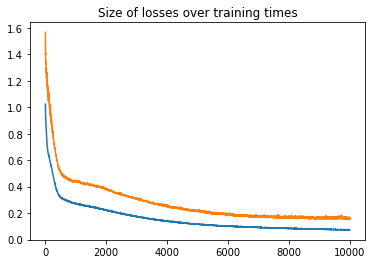

In [51]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.title("Size of losses over training times") 
plt.show()

In the diagram above you will see the development of our error (blue) and the results of our validation checks (orange). Ideally both should decrease over time depending on the number of iterations or training cycles done.